# Importantando bibliotecas

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Semente

In [2]:
SEED = 42

# Objetivo

O objetivo teste modelo é predizer se, de acordo com as características da pessoa (frequência que vai a museus, quais tipos de obra gosta mais, se acompanha artístas, entre outras), ela usaria nosso aplicativo ou não, levando em consideração do que a pessoa gosta e como é sua experiência ao visitar um museu e o que nosso aplicativo oferece de funcionalidades.

#### Modelo

Um modelo criado neste contexto precisa levar então em consideração algumas coisas:

- Pessoas mais propensas em usar o Leontis, possuem mais características do público alvo e por isso é interessante adicionar pesos as características mais relevantes, essas são:

    + <strong>Tipo de arte que mais gosta:</strong> pinturas e fotografias têm mais a ver com nosso foco atualmente, indivíduos que se interessam mais por arte de rua ou arte digital, podem não achar o aplicativo interessante por abordar outro conteúdo;
    + <strong>Frequência que vai a museus:</strong> extremamente importante, pessoas que nunca vão ou vão raramente, é difícil instalarem um app sobre arte e de idas a museus;
    + <strong>Guia:</strong> informação valiosa em nosso contexto, uma das principais funcionalidades é justamente o guia de museu. Caso não utilize atualmente, improvável de usar no app, diminuindo assim a chance de instalarem;
    + <strong>Motivos:</strong> Leontis sendo uma plataforma de cultura e aprendizado, pessoas com interesse maior em aprender ou se inspirarem quando vão a museus, podem gostar mais do aplicativo;
    + <strong>Falta de informação:</strong> uma das perguntas mais importantes. Outra principal funcionalidade é o scanner, que serve para facilitar sua experiência no museu, quando sentir falta de informação da obra, escaneando-a o app te retorna mais informações. Porém isto se torna inútil caso o indivíduo se sinta satisfeito com o que é passado no museu;
    + <strong>Procurar informações:</strong> se a pessoa não tem costume de procurar essas informações, dificilmente usará o scanner mesmo não ficando satisafeito com o que é passado;
    + <strong>Achar informações:</strong> também, se atualmente ela pesquisa e encontra o que queria, é mais difícil de procurar um meio alternativo de busca.

- Claro que o ideal é ter um modelo balançeado, ou seja, para cada classe ter uma boa performance de predição contendo pequenos erros para que não fique viciado. Porém, em nosso contexto, é mais importante acertar quem realmente usaria nosso aplicativo, do que errar dizendo que não é um possível usuário mesmo sendo. Ou seja, é melhor o modelo predizer pra menos o número de possíveis usuários, do que pra mais, focando em definir que quem o modelo predisse que é um possível usuário, realmente seja, e predizendo que não era um possível usuário mesmo sendo, é menos relevante.

# Carregando base e escolhendo colunas

In [3]:
dados = pd.read_excel('dados_possiveis_usuarios_c_label.xlsx')
teste = pd.read_excel('dados_de_teste.xlsx')
dados.head()

,ID,Hora de início,Hora de conclusão,E-mail,Nome,Hora da última modificação,Em qual faixa etária você se encaixa?,Com qual gênero você se identifica?,Qual seu nível de formação atual?,Qual a renda per capita da sua casa? (A renda per capita é calculada somando a renda de cada indivíduo da casa e dividindo pela quantidade de pessoas),...,Você já participou de algum curso ou atividade relacionada à arte?,Você segue artístas ou páginas relacionadas à arte nas rede sociais?,"Como é sua experiência ao visitar um museu normalmente? Caso nunca tenha visitado, selecione a que você acredita que seguiria.",Você já usou um aplicativo de um museu ou relacionado à arte?,O que mais te atrai em visitar museus ou exposições de arte?,Você sente falta de mais informações sobre as obras nos museus?,Você procura saber sobre essas informações faltantes?,De que forma você costuma buscar essas informações?,Você encontra o que precisa/esperava ao pesquisar?,Usaria o aplicativo?
0,1,2024-08-16 11:18:14,2024-08-16 11:20:21,anonymous,NaN,NaN,Menos de 18 anos,Masculino,Cursando ensino médio,"Classes D/E: até R$ 2,9 mil",...,Não,Sim,Sem um guia/planejamento para ver as obras.,Não,Lazer,"Sim, sinto falta de mais informações","Sim, procuro","Busca em navegadores (Google, Yahoo, Edge, Ope...",Não,Sim
1,2,2024-08-16 12:18:44,2024-08-16 12:19:31,anonymous,NaN,NaN,Entre 25 e 35 anos,Feminino,Ensino superior concluído,"Classe C: entre R$ 2,9 mil e R$ 7,1 mil",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Não
2,3,2024-08-16 12:19:26,2024-08-16 12:20:28,anonymous,NaN,NaN,Menos de 18 anos,Feminino,Cursando ensino médio,"Classe C: entre R$ 2,9 mil e R$ 7,1 mil",...,Sim,Sim,Sem um guia/planejamento para ver as obras.,Não,Aprendizado,"Não, acredito que o que tem no museu é o sufic...",NaN,NaN,NaN,Não
3,4,2024-08-16 12:19:24,2024-08-16 12:20:34,anonymous,NaN,NaN,Menos de 18 anos,Masculino,Cursando ensino médio,"Classe B: entre R$ 7,1 mil e R$ 22 mil",...,Não,Sim,Sem um guia/planejamento para ver as obras.,Não,Lazer,"Sim, sinto falta de mais informações","Não, apenas me conformo",NaN,NaN,Não
4,5,2024-08-16 12:19:43,2024-08-16 12:21:36,anonymous,NaN,NaN,Entre 46 e 59 anos,Masculino,Ensino superior concluído,Classe A: superior a R$ 22 mil,...,Sim,Não,Planejo minha rota antes.,Sim,Inspiração,"Sim, sinto falta de mais informações","Não, apenas me conformo",NaN,NaN,Não


In [4]:
dados.columns

Index(['ID', 'Hora de início', 'Hora de conclusão', 'E-mail', 'Nome',
       'Hora da última modificação', 'Em qual faixa etária você se encaixa?',
       'Com qual gênero você se identifica?',
       'Qual seu nível de formação atual?',
       'Qual a renda per capita da sua casa? (A renda per capita é calculada somando a renda de cada indivíduo da casa e dividindo pela quantidade de pessoas)',
       'Há quanto tempo você se interessa por arte?',
       'Qual das opções de arte abaixo você mais gosta?',
       'Com que frequência você vai aos museus?',
       'Você já participou de algum curso ou atividade relacionada à arte?',
       'Você segue artístas ou páginas relacionadas à arte nas rede sociais?',
       'Como é sua experiência ao visitar um museu normalmente? Caso nunca tenha visitado, selecione a que você acredita que seguiria.',
       'Você já usou um aplicativo de um museu ou relacionado à arte?',
       'O que mais te atrai em visitar museus ou exposições de arte?',
   

In [5]:
dados = dados.drop(columns=['ID', 'Hora de início', 'Hora de conclusão', 'E-mail', 'Nome',
       'Hora da última modificação', 'Com qual gênero você se identifica?', 'Qual seu nível de formação atual?'])
dados

,Em qual faixa etária você se encaixa?,Qual a renda per capita da sua casa? (A renda per capita é calculada somando a renda de cada indivíduo da casa e dividindo pela quantidade de pessoas),Há quanto tempo você se interessa por arte?,Qual das opções de arte abaixo você mais gosta?,Com que frequência você vai aos museus?,Você já participou de algum curso ou atividade relacionada à arte?,Você segue artístas ou páginas relacionadas à arte nas rede sociais?,"Como é sua experiência ao visitar um museu normalmente? Caso nunca tenha visitado, selecione a que você acredita que seguiria.",Você já usou um aplicativo de um museu ou relacionado à arte?,O que mais te atrai em visitar museus ou exposições de arte?,Você sente falta de mais informações sobre as obras nos museus?,Você procura saber sobre essas informações faltantes?,De que forma você costuma buscar essas informações?,Você encontra o que precisa/esperava ao pesquisar?,Usaria o aplicativo?
0,Menos de 18 anos,"Classes D/E: até R$ 2,9 mil",Menos de 2 anos,Fotografia,Raramente (uma vez ao ano),Não,Sim,Sem um guia/planejamento para ver as obras.,Não,Lazer,"Sim, sinto falta de mais informações","Sim, procuro","Busca em navegadores (Google, Yahoo, Edge, Ope...",Não,Sim
1,Entre 25 e 35 anos,"Classe C: entre R$ 2,9 mil e R$ 7,1 mil",Não me interesso,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Não
2,Menos de 18 anos,"Classe C: entre R$ 2,9 mil e R$ 7,1 mil",De 2 a 4 anos,Escultura,Ocasionalmente (máximo três vezes ao ano),Sim,Sim,Sem um guia/planejamento para ver as obras.,Não,Aprendizado,"Não, acredito que o que tem no museu é o sufic...",NaN,NaN,NaN,Não
3,Menos de 18 anos,"Classe B: entre R$ 7,1 mil e R$ 22 mil",Estou iniciando agora,Pintura,Ocasionalmente (máximo três vezes ao ano),Não,Sim,Sem um guia/planejamento para ver as obras.,Não,Lazer,"Sim, sinto falta de mais informações","Não, apenas me conformo",NaN,NaN,Não
4,Entre 46 e 59 anos,Classe A: superior a R$ 22 mil,Há mais de 10 anos,Fotografia,Muito frequentemente (mais de cinco vezes ao ano),Sim,Não,Planejo minha rota antes.,Sim,Inspiração,"Sim, sinto falta de mais informações","Não, apenas me conformo",NaN,NaN,Não
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
243,60+ anos,"Classe C: entre R$ 2,9 mil e R$ 7,1 mil",Há mais de 10 anos,Pintura,Ocasionalmente (máximo três vezes ao ano),Não,Não,Sem um guia/planejamento para ver as obras.,Não,Inspiração,"Não, acredito que o que tem no museu é o sufic...",NaN,NaN,NaN,Não
244,Entre 25 e 35 anos,"Classe C: entre R$ 2,9 mil e R$ 7,1 mil",Estou iniciando agora,Pintura,Raramente (uma vez ao ano),Não,Não,Sem um guia/planejamento para ver as obras.,Não,Aprendizado,"Não, acredito que o que tem no museu é o sufic...",NaN,NaN,NaN,Não
245,Menos de 18 anos,"Classe B: entre R$ 7,1 mil e R$ 22 mil",Estou iniciando agora,Fotografia,Raramente (uma vez ao ano),Não,Sim,Sem um guia/planejamento para ver as obras.,Não,Inspiração,"Sim, sinto falta de mais informações","Sim, procuro","Busca em navegadores (Google, Yahoo, Edge, Ope...",Não,Sim
246,Entre 36 e 45 anos,"Classe B: entre R$ 7,1 mil e R$ 22 mil",Menos de 2 anos,Arte digital,Raramente (uma vez ao ano),Não,Não,Sem um guia/planejamento para ver as obras.,Não,Lazer,"Sim, sinto falta de mais informações","Não, apenas me conformo",NaN,NaN,Não


## Tratando base

In [6]:
colunas_dados = dados.columns
dados.rename(columns={colunas_dados[1]: 'Qual a renda per capita da sua casa?'}, inplace = True)

In [7]:
dados.fillna({'Qual das opções de arte abaixo você mais gosta?': 'Não se interessa por arte', 'Com que frequência você vai aos museus?': 'Não se interessa por arte', 'Você já participou de algum curso ou atividade relacionada à arte?': 'Não se interessa por arte', 'Você segue artístas ou páginas relacionadas à arte nas rede sociais?': 'Não se interessa por arte', 'Como é sua experiência ao visitar um museu normalmente? Caso nunca tenha visitado, selecione a que você acredita que seguiria.': 'Não se interessa por arte', 'Você já usou um aplicativo de um museu ou relacionado à arte?': 'Não se interessa por arte', 'O que mais te atrai em visitar museus ou exposições de arte?': 'Não se interessa por arte'}, inplace=True)
dados.fillna({'Você sente falta de mais informações sobre as obras nos museus?': 'Não vai a museus'}, inplace=True)
dados.fillna({'Você procura saber sobre essas informações faltantes?': 'Não sente falta de informações'}, inplace=True)
dados.fillna({'De que forma você costuma buscar essas informações?': 'Não procura essas informações', 'Você encontra o que precisa/esperava ao pesquisar?': 'Não procura essas informações'}, inplace=True)

dados.isna().sum()

Em qual faixa etária você se encaixa?                                                                                             0
Qual a renda per capita da sua casa?                                                                                              0
Há quanto tempo você se interessa por arte?                                                                                       0
Qual das opções de arte abaixo você mais gosta?                                                                                   0
Com que frequência você vai aos museus?                                                                                           0
Você já participou de algum curso ou atividade relacionada à arte?                                                                0
Você segue artístas ou páginas relacionadas à arte nas rede sociais?                                                              0
Como é sua experiência ao visitar um museu normalmente? Caso nunca tenha vis

## Separando em atributo e label

In [8]:
df_y, df_x = dados['Usaria o aplicativo?'], dados.drop(columns=['Usaria o aplicativo?'])
teste_y, teste_x = teste['Usaria o aplicativo?'], teste.drop(columns=['Usaria o aplicativo?'])
display(df_x.head())
display(df_y.head())

,Em qual faixa etária você se encaixa?,Qual a renda per capita da sua casa?,Há quanto tempo você se interessa por arte?,Qual das opções de arte abaixo você mais gosta?,Com que frequência você vai aos museus?,Você já participou de algum curso ou atividade relacionada à arte?,Você segue artístas ou páginas relacionadas à arte nas rede sociais?,"Como é sua experiência ao visitar um museu normalmente? Caso nunca tenha visitado, selecione a que você acredita que seguiria.",Você já usou um aplicativo de um museu ou relacionado à arte?,O que mais te atrai em visitar museus ou exposições de arte?,Você sente falta de mais informações sobre as obras nos museus?,Você procura saber sobre essas informações faltantes?,De que forma você costuma buscar essas informações?,Você encontra o que precisa/esperava ao pesquisar?
0,Menos de 18 anos,"Classes D/E: até R$ 2,9 mil",Menos de 2 anos,Fotografia,Raramente (uma vez ao ano),Não,Sim,Sem um guia/planejamento para ver as obras.,Não,Lazer,"Sim, sinto falta de mais informações","Sim, procuro","Busca em navegadores (Google, Yahoo, Edge, Ope...",Não
1,Entre 25 e 35 anos,"Classe C: entre R$ 2,9 mil e R$ 7,1 mil",Não me interesso,Não se interessa por arte,Não se interessa por arte,Não se interessa por arte,Não se interessa por arte,Não se interessa por arte,Não se interessa por arte,Não se interessa por arte,Não vai a museus,Não sente falta de informações,Não procura essas informações,Não procura essas informações
2,Menos de 18 anos,"Classe C: entre R$ 2,9 mil e R$ 7,1 mil",De 2 a 4 anos,Escultura,Ocasionalmente (máximo três vezes ao ano),Sim,Sim,Sem um guia/planejamento para ver as obras.,Não,Aprendizado,"Não, acredito que o que tem no museu é o sufic...",Não sente falta de informações,Não procura essas informações,Não procura essas informações
3,Menos de 18 anos,"Classe B: entre R$ 7,1 mil e R$ 22 mil",Estou iniciando agora,Pintura,Ocasionalmente (máximo três vezes ao ano),Não,Sim,Sem um guia/planejamento para ver as obras.,Não,Lazer,"Sim, sinto falta de mais informações","Não, apenas me conformo",Não procura essas informações,Não procura essas informações
4,Entre 46 e 59 anos,Classe A: superior a R$ 22 mil,Há mais de 10 anos,Fotografia,Muito frequentemente (mais de cinco vezes ao ano),Sim,Não,Planejo minha rota antes.,Sim,Inspiração,"Sim, sinto falta de mais informações","Não, apenas me conformo",Não procura essas informações,Não procura essas informações


0    Sim
1    Não
2    Não
3    Não
4    Não
Name: Usaria o aplicativo?, dtype: object

In [9]:
df_x.columns

Index(['Em qual faixa etária você se encaixa?',
       'Qual a renda per capita da sua casa?',
       'Há quanto tempo você se interessa por arte?',
       'Qual das opções de arte abaixo você mais gosta?',
       'Com que frequência você vai aos museus?',
       'Você já participou de algum curso ou atividade relacionada à arte?',
       'Você segue artístas ou páginas relacionadas à arte nas rede sociais?',
       'Como é sua experiência ao visitar um museu normalmente? Caso nunca tenha visitado, selecione a que você acredita que seguiria.',
       'Você já usou um aplicativo de um museu ou relacionado à arte?',
       'O que mais te atrai em visitar museus ou exposições de arte?',
       'Você sente falta de mais informações sobre as obras nos museus?',
       'Você procura saber sobre essas informações faltantes?',
       'De que forma você costuma buscar essas informações?',
       'Você encontra o que precisa/esperava ao pesquisar?'],
      dtype='object')

# Modelos de exploração (testando diferentes tipos de algoritmos)

Primeiro vamos explorar alguns dos algoritmos de modelo supervisionado sem adicionar os pesos as características

## Tratando dataframe

In [10]:
from sklearn.preprocessing import LabelEncoder


for i in df_x:
    le_x = LabelEncoder()
    df_x[i] = le_x.fit_transform(df_x[i])

le_y = LabelEncoder()

df_y = le_y.fit_transform(df_y)

for i in teste_x:
    le_x = LabelEncoder()
    teste_x[i] = le_x.fit_transform(teste_x[i])

le_y = LabelEncoder()

teste_y = le_y.fit_transform(teste_y)

display(df_x.head())
display(df_y)

,Em qual faixa etária você se encaixa?,Qual a renda per capita da sua casa?,Há quanto tempo você se interessa por arte?,Qual das opções de arte abaixo você mais gosta?,Com que frequência você vai aos museus?,Você já participou de algum curso ou atividade relacionada à arte?,Você segue artístas ou páginas relacionadas à arte nas rede sociais?,"Como é sua experiência ao visitar um museu normalmente? Caso nunca tenha visitado, selecione a que você acredita que seguiria.",Você já usou um aplicativo de um museu ou relacionado à arte?,O que mais te atrai em visitar museus ou exposições de arte?,Você sente falta de mais informações sobre as obras nos museus?,Você procura saber sobre essas informações faltantes?,De que forma você costuma buscar essas informações?,Você encontra o que precisa/esperava ao pesquisar?
0,5,3,4,4,5,0,2,3,0,3,2,2,3,0
1,2,2,5,5,3,1,1,1,1,4,0,0,5,1
2,5,2,0,3,4,2,2,3,0,1,1,0,5,1
3,5,1,2,6,4,0,2,3,0,3,2,1,5,1
4,4,0,3,4,1,2,0,2,2,2,2,1,5,1


array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 0])

## Dividindo entre treino e teste

In [11]:
# from sklearn.model_selection import train_test_split


# df_x, teste_x, df_y, teste_y = train_test_split(df_x, df_y, test_size=0.25, random_state=SEED)

# display(df_x)
# display(df_y)
# display(teste_x)
# display(teste_y)

## Naive Bayes

### Modelo

In [12]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
predicao_gnb = gnb.fit(df_x, df_y).predict(teste_x)

display(predicao_gnb)

array([0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0,
       1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0])

### Avaliando modelo

In [13]:
from sklearn.metrics import *

print(classification_report(teste_y, predicao_gnb, target_names=list(le_y.classes_)))

              precision    recall  f1-score   support

         Não       0.65      0.57      0.60        23
         Sim       0.50      0.59      0.54        17

    accuracy                           0.57        40
   macro avg       0.57      0.58      0.57        40
weighted avg       0.59      0.57      0.58        40



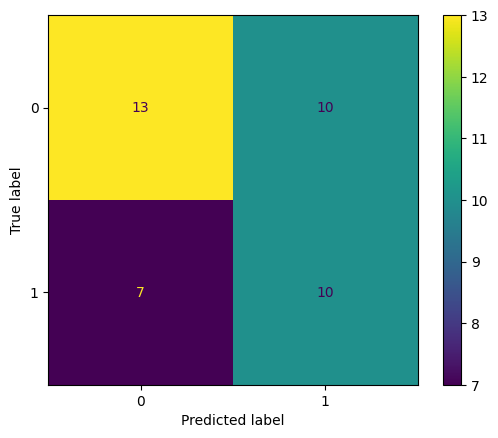

In [14]:
ConfusionMatrixDisplay(confusion_matrix(teste_y, predicao_gnb)).plot()

Precision da classe 'Sim' está muito ruim, já que quase metade ele predisse ser 'Sim' mas pertencia a classe 'Não'. Isso pode ter acontecido pelo treino ter uma diferença de dados da classe 'Não' e da classe 'Sim' menor do que no teste.

### Kfold e Cross Validation

In [15]:
# from sklearn.model_selection import cross_val_score
# from sklearn.model_selection import KFold

# kf = KFold(n_splits=4, random_state=None, shuffle=False)
# gnb = GaussianNB()

# lista_acuracias = []
# lista_precisions = []

# for i, (train_index, test_index) in enumerate(kf.split(df_x)):
#     # Separando treino e teste de x e y
#     train_x, test_x = df_x.iloc[train_index], df_x.iloc[test_index]
#     train_y, test_y = df_y[train_index], df_y[test_index]

#     # Treinando o modelo
#     gnb.fit(train_x, train_y)

#     # Predict
#     predict = gnb.predict(test_x)

#     # Avaliando modelo
#     lista_acuracias.append(accuracy_score(test_y, predict))
#     lista_precisions.append(precision_score(test_y, predict, pos_label=1))
#     print(f'\n--- Fold {i} ---')
#     print(classification_report(test_y, predict, target_names=list(le_y.classes_)))
#     matriz_confusao = confusion_matrix(test_y, predict)
#     matriz_confusao_display = ConfusionMatrixDisplay(matriz_confusao)
#     matriz_confusao_display.plot()

In [16]:
# print('Acurácia média: ', sum(lista_acuracias)/len(lista_acuracias))
# print('Precision médio do "Sim": ', sum(lista_precisions)/len(lista_precisions))

Mesmo agora usando Cross Validation e KFold, ele prediz que boa parte dos dados da classe 'Não' eram da classe 'Sim'. Resultado não esperado, já que possui bem menos dados da label 1.

## Regressão linear

### Modelo

In [17]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()

predicao_lr = lr.fit(df_x, df_y).predict(teste_x)

display(predicao_lr)

array([1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0])

### Avaliando  modelo

In [18]:
from sklearn.metrics import *

print(classification_report(teste_y, predicao_lr, target_names=list(le_y.classes_)))

              precision    recall  f1-score   support

         Não       0.29      0.22      0.25        23
         Sim       0.22      0.29      0.25        17

    accuracy                           0.25        40
   macro avg       0.26      0.26      0.25        40
weighted avg       0.26      0.25      0.25        40



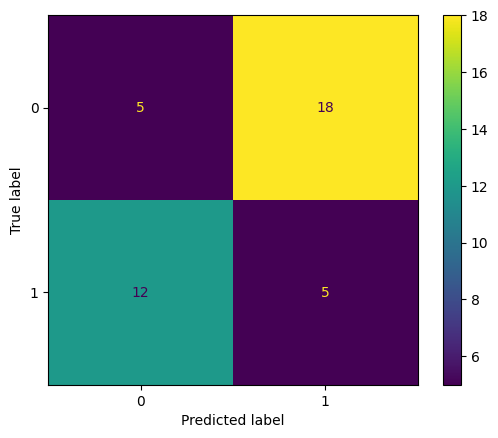

In [19]:
ConfusionMatrixDisplay(confusion_matrix(teste_y, predicao_lr)).plot()

Este modelo teve uma péssima performance com a classe 'Sim', principalmente com seu Precision, nosso principal foco.

### Kfold e Cross Validation

In [20]:
# from sklearn.model_selection import cross_val_score
# from sklearn.model_selection import KFold

# kf = KFold(n_splits=4, random_state=None, shuffle=False)
# lr = LogisticRegression()

# lista_acuracias = []
# lista_precisions = []

# for i, (train_index, test_index) in enumerate(kf.split(df_x)):
#     # Separando treino e teste de x e y
#     train_x, test_x = df_x.iloc[train_index], df_x.iloc[test_index]
#     train_y, test_y = df_y[train_index], df_y[test_index]

#     # Treinando o modelo
#     lr.fit(train_x, train_y)

#     # Predict
#     predict = lr.predict(test_x)

#     # Avaliando modelo
#     lista_acuracias.append(accuracy_score(test_y, predict))
#     lista_precisions.append(precision_score(test_y, predict, pos_label=1))
#     print(f'\n--- Fold {i} ---')
#     print(classification_report(test_y, predict, target_names=list(le_y.classes_)))
#     matriz_confusao = confusion_matrix(test_y, predict)
#     matriz_confusao_display = ConfusionMatrixDisplay(matriz_confusao)
#     matriz_confusao_display.plot()

In [21]:
# print('Acurácia média: ', sum(lista_acuracias)/len(lista_acuracias))
# print('Precision médio do "Sim": ', sum(lista_precisions)/len(lista_precisions))

Mesmo mudando os dados de treino e teste, os modelos se manteram com uma performance muito ruim com a classe 'Sim'.

## Arvore de decisão

### Modelo

In [22]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier()
predicao_dtc = dtc.fit(df_x, df_y).predict(teste_x)

display(predicao_dtc)

array([1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0])

### Avaliando modelo

In [23]:
from sklearn.metrics import *

print(classification_report(teste_y, predicao_dtc, target_names=list(le_y.classes_)))

              precision    recall  f1-score   support

         Não       0.30      0.26      0.28        23
         Sim       0.15      0.18      0.16        17

    accuracy                           0.23        40
   macro avg       0.22      0.22      0.22        40
weighted avg       0.24      0.23      0.23        40



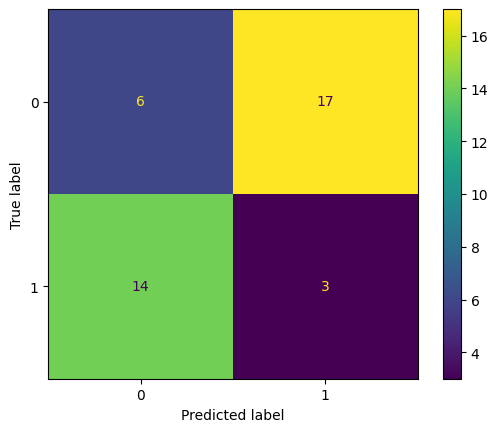

In [24]:
ConfusionMatrixDisplay(confusion_matrix(teste_y, predicao_dtc)).plot()

Modelo usando árvore de decisão performou muito bem, inclusive a classe 'Sim'

### Visualizando modelo

[Text(0.5, 0.75, 'Você procura saber sobre essas informações faltantes? <= 1.5\ngini = 0.453\nsamples = 248\nvalue = [162, 86]\nclass = 0'),
 Text(0.25, 0.25, 'gini = 0.0\nsamples = 162\nvalue = [162, 0]\nclass = 0'),
 Text(0.375, 0.5, 'True  '),
 Text(0.75, 0.25, 'gini = 0.0\nsamples = 86\nvalue = [0, 86]\nclass = 1'),
 Text(0.625, 0.5, '  False')]

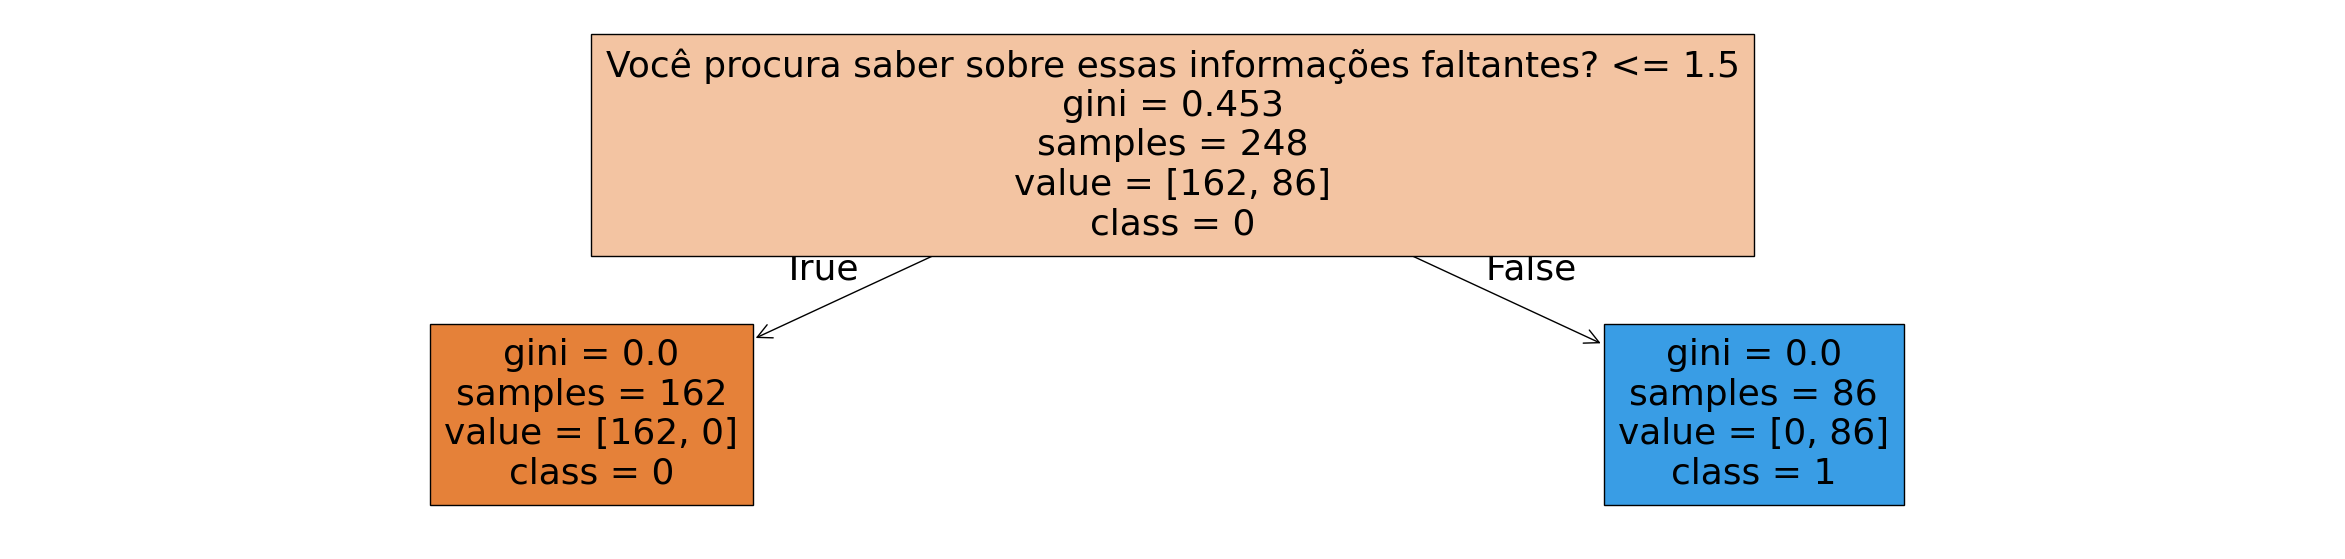

In [25]:
from sklearn import tree

plt.figure(figsize=(30,7))
classes = [str(x) for x in dtc.classes_]

tree.plot_tree(dtc, 
               feature_names=list(df_x.columns), 
               class_names=classes, filled=True)

### Kfold e Cross Validation

In [26]:
# from sklearn.model_selection import cross_val_score
# from sklearn.model_selection import KFold

# kf = KFold(n_splits=4, random_state=None, shuffle=False)
# dtc = DecisionTreeClassifier()

# lista_acuracias = []
# lista_precisions = []

# for i, (train_index, test_index) in enumerate(kf.split(df_x)):
#     # Separando treino e teste de x e y
#     train_x, test_x = df_x.iloc[train_index], df_x.iloc[test_index]
#     train_y, test_y = df_y[train_index], df_y[test_index]

#     # Treinando o modelo
#     dtc.fit(train_x, train_y)

#     # Predict
#     predict = dtc.predict(test_x)

#     # Avaliando modelo
#     lista_acuracias.append(accuracy_score(test_y, predict))
#     lista_precisions.append(precision_score(test_y, predict, pos_label=1))
#     print(f'\n--- Fold {i} ---')
#     print(classification_report(test_y, predict, target_names=list(le_y.classes_)))
#     matriz_confusao = confusion_matrix(test_y, predict)
#     matriz_confusao_display = ConfusionMatrixDisplay(matriz_confusao)
#     matriz_confusao_display.plot()

In [27]:
# print('Acurácia média: ', sum(lista_acuracias)/len(lista_acuracias))
# print('Precision médio do "Sim": ', sum(lista_precisions)/len(lista_precisions))

Divisão do primeiro fold ficou muito ruim, já os outros acabaram tendo um recall inforior ao precision, porém ainda razoavelmente boas

## KNN

### Modelo

In [28]:
K = 5

In [29]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=K)
knn.fit(df_x, df_y)
predicao_knn = knn.predict(teste_x)

display(predicao_knn)

array([1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0,
       1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0])

### Avaliando modelo

In [30]:
from sklearn.metrics import *

print(classification_report(teste_y, predicao_knn, target_names=list(le_y.classes_)))

              precision    recall  f1-score   support

         Não       0.62      0.57      0.59        23
         Sim       0.47      0.53      0.50        17

    accuracy                           0.55        40
   macro avg       0.55      0.55      0.55        40
weighted avg       0.56      0.55      0.55        40



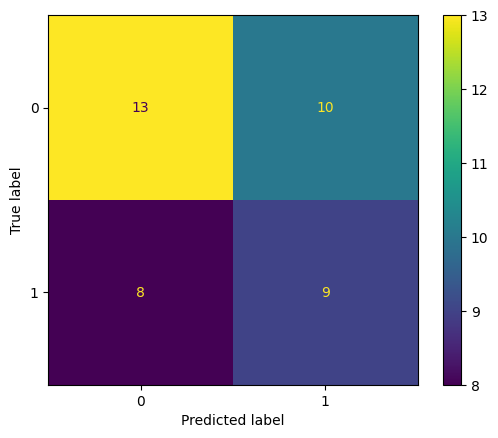

In [31]:
ConfusionMatrixDisplay(confusion_matrix(teste_y, predicao_knn)).plot()

Teve uma péssima performance com a classe 'Sim', tanto no Recall quanto no Precision

### Kfold e Cross Validation

In [32]:
# from sklearn.model_selection import cross_val_score
# from sklearn.model_selection import KFold

# kf = KFold(n_splits=4, random_state=None, shuffle=False)
# knn = KNeighborsClassifier(n_neighbors=K)

# lista_acuracias = []
# lista_precisions = []

# for i, (train_index, test_index) in enumerate(kf.split(df_x)):
#     # Separando treino e teste de x e y
#     train_x, test_x = df_x.iloc[train_index], df_x.iloc[test_index]
#     train_y, test_y = df_y[train_index], df_y[test_index]

#     # Treinando o modelo
#     knn.fit(train_x, train_y)

#     # Predict
#     predict = knn.predict(test_x)

#     # Avaliando modelo
#     lista_acuracias.append(accuracy_score(test_y, predict))
#     lista_precisions.append(precision_score(test_y, predict, pos_label=1))
#     print(f'\n--- Fold {i} ---')
#     print(classification_report(test_y, predict, target_names=list(le_y.classes_)))
#     matriz_confusao = confusion_matrix(test_y, predict)
#     matriz_confusao_display = ConfusionMatrixDisplay(matriz_confusao)
#     matriz_confusao_display.plot()

In [33]:
# print('Acurácia média: ', sum(lista_acuracias)/len(lista_acuracias))
# print('Precision médio do "Sim": ', sum(lista_precisions)/len(lista_precisions))

Péssima performance em todos os folds com a classe 'Sim'

In [34]:
import matplotlib.pyplot as plt

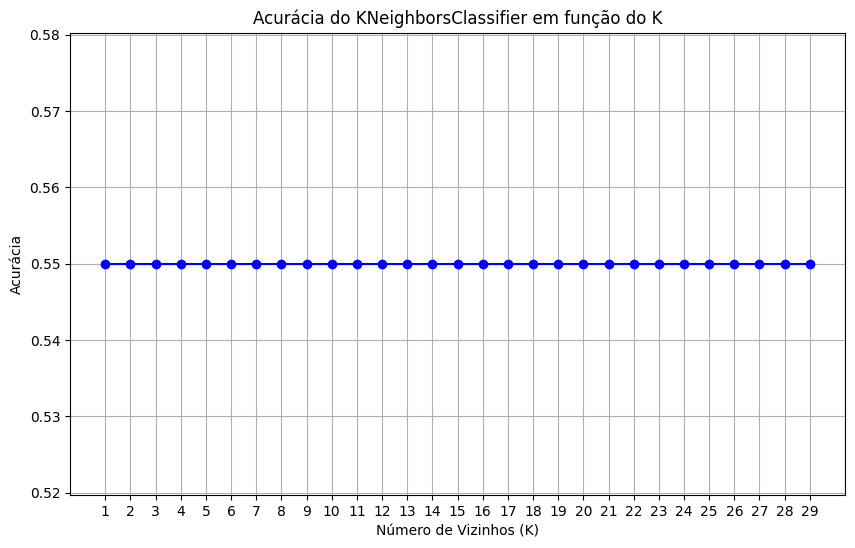

In [35]:
acuracias = []
intervalo = range(1, 30)
for k in intervalo:
    knn = KNeighborsClassifier(n_neighbors=K)
    knn.fit(df_x, df_y)
    predict = knn.predict(teste_x)
    acuracias.append(accuracy_score(teste_y, predict))

lista_acuracias = list(intervalo)

plt.figure(figsize=(10, 6))
plt.plot(lista_acuracias, acuracias, marker='o', linestyle='-', color='b')
plt.title('Acurácia do KNeighborsClassifier em função do K')
plt.xlabel('Número de Vizinhos (K)')
plt.ylabel('Acurácia')
plt.xticks(lista_acuracias)
plt.grid(True)
plt.show()

#### A acurácia não muda com o número de vizinhos

## Conclusão

Apesar de todos os modelos terem uma boa acurácia, para o modelo supervisionado no nosso caso é interessante utilizar um algoritmo que leva em consideração o valor dos dados e não apenas sua frequência na base, já que para definir se uma pessoa é um possível usuário de nosso aplicativo, olhamos para características mais atrativas e damos um peso maior a elas, já para aspectos negativos como baixa ida a museus, desinteresse em arte ou se sentir satisfeito com as informações das obras que já estão nos museus, por exemplo, damos pontuações mais baixas e até as vezes, negativas.
Olhando por este lado, é prefirível usar a regressão linear ou o KNN. Visto que o KNN faz o cálculo das distâncias dos novos dados em relação aos de treino, assim definindo sua classe, iremos usar este algoritmo.

# Modelo com KNN

In [36]:
df_y_2, df_x_2 = dados['Usaria o aplicativo?'], dados.drop(columns=['Usaria o aplicativo?'])
display(df_x_2.head())
display(df_y_2.head())

,Em qual faixa etária você se encaixa?,Qual a renda per capita da sua casa?,Há quanto tempo você se interessa por arte?,Qual das opções de arte abaixo você mais gosta?,Com que frequência você vai aos museus?,Você já participou de algum curso ou atividade relacionada à arte?,Você segue artístas ou páginas relacionadas à arte nas rede sociais?,"Como é sua experiência ao visitar um museu normalmente? Caso nunca tenha visitado, selecione a que você acredita que seguiria.",Você já usou um aplicativo de um museu ou relacionado à arte?,O que mais te atrai em visitar museus ou exposições de arte?,Você sente falta de mais informações sobre as obras nos museus?,Você procura saber sobre essas informações faltantes?,De que forma você costuma buscar essas informações?,Você encontra o que precisa/esperava ao pesquisar?
0,Menos de 18 anos,"Classes D/E: até R$ 2,9 mil",Menos de 2 anos,Fotografia,Raramente (uma vez ao ano),Não,Sim,Sem um guia/planejamento para ver as obras.,Não,Lazer,"Sim, sinto falta de mais informações","Sim, procuro","Busca em navegadores (Google, Yahoo, Edge, Ope...",Não
1,Entre 25 e 35 anos,"Classe C: entre R$ 2,9 mil e R$ 7,1 mil",Não me interesso,Não se interessa por arte,Não se interessa por arte,Não se interessa por arte,Não se interessa por arte,Não se interessa por arte,Não se interessa por arte,Não se interessa por arte,Não vai a museus,Não sente falta de informações,Não procura essas informações,Não procura essas informações
2,Menos de 18 anos,"Classe C: entre R$ 2,9 mil e R$ 7,1 mil",De 2 a 4 anos,Escultura,Ocasionalmente (máximo três vezes ao ano),Sim,Sim,Sem um guia/planejamento para ver as obras.,Não,Aprendizado,"Não, acredito que o que tem no museu é o sufic...",Não sente falta de informações,Não procura essas informações,Não procura essas informações
3,Menos de 18 anos,"Classe B: entre R$ 7,1 mil e R$ 22 mil",Estou iniciando agora,Pintura,Ocasionalmente (máximo três vezes ao ano),Não,Sim,Sem um guia/planejamento para ver as obras.,Não,Lazer,"Sim, sinto falta de mais informações","Não, apenas me conformo",Não procura essas informações,Não procura essas informações
4,Entre 46 e 59 anos,Classe A: superior a R$ 22 mil,Há mais de 10 anos,Fotografia,Muito frequentemente (mais de cinco vezes ao ano),Sim,Não,Planejo minha rota antes.,Sim,Inspiração,"Sim, sinto falta de mais informações","Não, apenas me conformo",Não procura essas informações,Não procura essas informações


0    Sim
1    Não
2    Não
3    Não
4    Não
Name: Usaria o aplicativo?, dtype: object

## Tratando dados

In [37]:
df_x_2.fillna("#", inplace=True)

#### Aplicando os pesos

In [38]:
df_y_2

0      Sim
1      Não
2      Não
3      Não
4      Não
      ... 
243    Não
244    Não
245    Sim
246    Não
247    Não
Name: Usaria o aplicativo?, Length: 248, dtype: object

In [39]:
mapeamento_tipo_arte = {'Não se interessa por arte': 0, 'Pintura': 8, 'Fotografia': 8, 'Escultura': 6, 'Arquitetura e Urbanismo': 5, 'Arte digital': 4,'Arte de rua/grafite': 3}
mapeamento_frequencia = {'Não se interessa por arte': 0, 'Frequentemente (máximo cinco vezes ao ano)': 10,'Muito frequentemente (mais de cinco vezes ao ano)': 9,'Ocasionalmente (máximo três vezes ao ano)': 8,'Raramente (uma vez ao ano)': 5,'Nunca': 1}
mapeamento_guia = {'Não se interessa por arte': 0, 'Planejo minha rota antes.': 10, 'Utilizo o planejamento de terceiros (sites, blogs, páginas em redes sociais que disponibilizam).': 9, 'Com um guia do próprio museu.': 8, 'Sem um guia/planejamento para ver as obras.': 2}
mapeamento_motivo = {'Não se interessa por arte': 0, 'Aprendizado': 10, 'Inspiração': 9, 'Lazer': 6, 'Apenas acompanho alguém': 3, 'Não visito': 1}
mapeamento_falta_info = {'Não vai a museus': 1, 'Sim, sinto falta de mais informações': 8, 'Não, acredito que o que tem no museu é o suficiente': 2}
mapeamento_procurar_info = {'Não sente falta de informações': 1, 'Sim, procuro': 7, 'Não, apenas me conformo': 3}
mapeamento_achar_info = {'Não procura essas informações': 1, 'Sim': 3, 'Não': 8}
mapeamento = {'Qual das opções de arte abaixo você mais gosta?': mapeamento_tipo_arte, 'Com que frequência você vai aos museus?': mapeamento_frequencia, 'Como é sua experiência ao visitar um museu normalmente? Caso nunca tenha visitado, selecione a que você acredita que seguiria.': mapeamento_guia, 'O que mais te atrai em visitar museus ou exposições de arte?': mapeamento_motivo, 'Você sente falta de mais informações sobre as obras nos museus?': mapeamento_falta_info, 'Você procura saber sobre essas informações faltantes?': mapeamento_procurar_info, 'Você encontra o que precisa/esperava ao pesquisar?': mapeamento_achar_info}

label_encoder = {}

for i in df_x_2:
    if df_x_2[i].dtype == object:
        if i in mapeamento.keys():
            df_x_2[i] = df_x_2[i].map(mapeamento[i])
        else:
            dicio_unicos = {}
            unicos = list(df_x_2[i].unique())
            for k, v in enumerate(unicos):
                dicio_unicos[v] = k
            df_x_2[i] = df_x_2[i].map(dicio_unicos)
            label_encoder[i] = dicio_unicos

mapeamento_usaria_app = {'Sim': 1, 'Não': 0}
df_y_2 = df_y_2.map(mapeamento_usaria_app)
    

In [40]:
display(df_x_2)
display(df_y_2)

,Em qual faixa etária você se encaixa?,Qual a renda per capita da sua casa?,Há quanto tempo você se interessa por arte?,Qual das opções de arte abaixo você mais gosta?,Com que frequência você vai aos museus?,Você já participou de algum curso ou atividade relacionada à arte?,Você segue artístas ou páginas relacionadas à arte nas rede sociais?,"Como é sua experiência ao visitar um museu normalmente? Caso nunca tenha visitado, selecione a que você acredita que seguiria.",Você já usou um aplicativo de um museu ou relacionado à arte?,O que mais te atrai em visitar museus ou exposições de arte?,Você sente falta de mais informações sobre as obras nos museus?,Você procura saber sobre essas informações faltantes?,De que forma você costuma buscar essas informações?,Você encontra o que precisa/esperava ao pesquisar?
0,0,0,0,8,5,0,0,2,0,6,8,7,0,8
1,1,1,1,0,0,1,1,0,1,0,1,1,1,1
2,0,1,2,6,8,2,0,2,0,10,2,1,1,1
3,0,2,3,8,8,0,0,2,0,6,8,3,1,1
4,2,3,4,8,9,2,2,10,2,9,8,3,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
243,5,1,4,8,8,0,2,2,0,9,2,1,1,1
244,1,1,3,8,5,0,2,2,0,10,2,1,1,1
245,0,2,3,8,5,0,0,2,0,9,8,7,0,8
246,3,2,0,4,5,0,2,2,0,6,8,3,1,1


0      1
1      0
2      0
3      0
4      0
      ..
243    0
244    0
245    1
246    0
247    0
Name: Usaria o aplicativo?, Length: 248, dtype: int64

In [41]:
label_encoder

{'Em qual faixa etária você se encaixa?': {'Menos de 18 anos': 0,
  'Entre 25 e 35 anos': 1,
  'Entre 46 e 59 anos': 2,
  'Entre 36 e 45 anos': 3,
  'Entre 18 e 24 anos': 4,
  '60+ anos': 5},
 'Qual a renda per capita da sua casa?': {'Classes D/E: até R$ 2,9 mil': 0,
  'Classe C: entre R$ 2,9 mil e R$ 7,1 mil': 1,
  'Classe B: entre R$ 7,1 mil e R$ 22 mil': 2,
  'Classe A: superior a R$ 22 mil': 3},
 'Há quanto tempo você se interessa por arte?': {'Menos de 2 anos': 0,
  'Não me interesso': 1,
  'De 2 a 4 anos': 2,
  'Estou iniciando agora': 3,
  'Há mais de 10 anos': 4,
  'De 5 a 9 anos': 5},
 'Você já participou de algum curso ou atividade relacionada à arte?': {'Não': 0,
  'Não se interessa por arte': 1,
  'Sim': 2},
 'Você segue artístas ou páginas relacionadas à arte nas rede sociais?': {'Sim': 0,
  'Não se interessa por arte': 1,
  'Não': 2},
 'Você já usou um aplicativo de um museu ou relacionado à arte?': {'Não': 0,
  'Não se interessa por arte': 1,
  'Sim': 2},
 'De que forma 

## Modelo básico

### Aplicando modelo

In [42]:
from sklearn.neighbors import KNeighborsClassifier

K = 5

knn = KNeighborsClassifier(n_neighbors=K)
knn.fit(df_x, df_y)
predicao_knn = knn.predict(teste_x)

display(predicao_knn)

array([1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0,
       1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0])

### Avaliando

In [43]:
from sklearn.metrics import *

print(classification_report(teste_y, predicao_knn, target_names=list(le_y.classes_)))

              precision    recall  f1-score   support

         Não       0.62      0.57      0.59        23
         Sim       0.47      0.53      0.50        17

    accuracy                           0.55        40
   macro avg       0.55      0.55      0.55        40
weighted avg       0.56      0.55      0.55        40



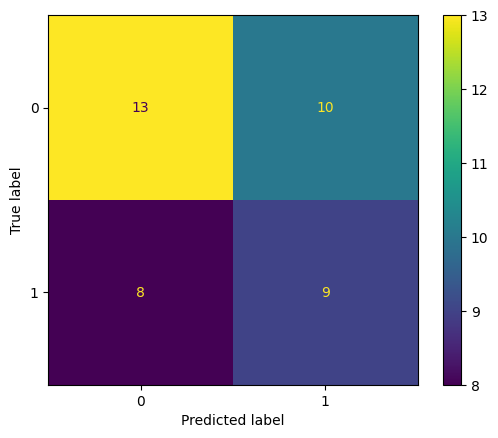

In [44]:
ConfusionMatrixDisplay(confusion_matrix(teste_y, predicao_knn)).plot()

## Modelo usando Cross Validation 

### Kfold e Cross Validation

1.0
1.0
0.9838709677419355
1.0


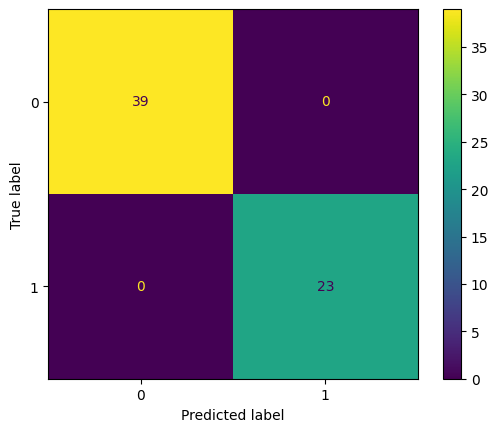

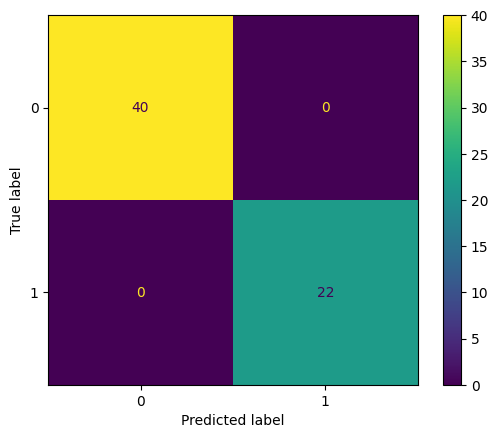

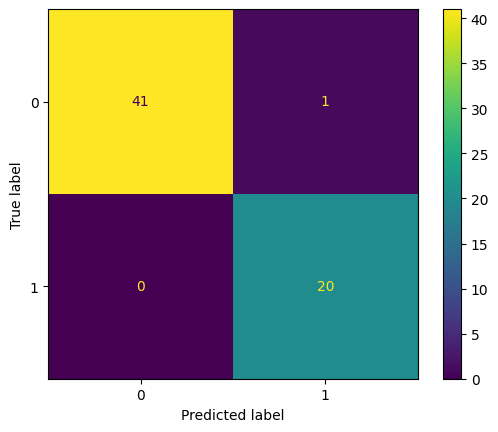

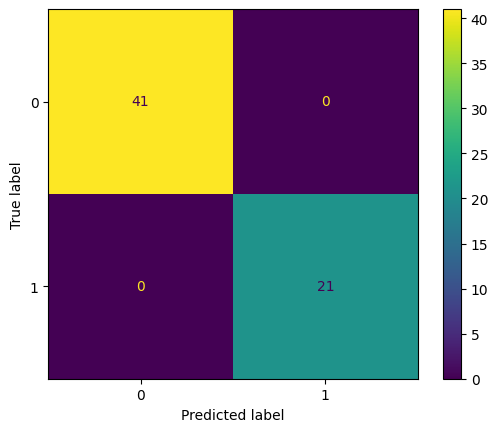

In [45]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

kf = KFold(n_splits=4, random_state=SEED, shuffle=True)
knn = KNeighborsClassifier(n_neighbors=K)

lista_acuracias = []
lista_precisions = []

for i, (train_index, test_index) in enumerate(kf.split(df_x)):
    # Separando treino e teste de x e y
    train_x, test_x = df_x_2.iloc[train_index], df_x_2.iloc[test_index]
    train_y, test_y = df_y_2[train_index], df_y_2[test_index]

    # Treinando o modelo
    knn.fit(train_x, train_y)

    # Predict
    predict = knn.predict(test_x)

    # Avaliando modelo
    lista_acuracias.append(accuracy_score(test_y, predict))
    lista_precisions.append(precision_score(test_y, predict))
    print(accuracy_score(test_y, predict))
    matriz_confusao = confusion_matrix(test_y, predict)
    matriz_confusao_display = ConfusionMatrixDisplay(matriz_confusao)
    matriz_confusao_display.plot()

In [46]:
print('Acurácia média: ', sum(lista_acuracias)/len(lista_acuracias))
print('Precision médio de "Sim": ', sum(lista_precisions)/len(lista_precisions))

Acurácia média:  0.9959677419354839
Precision médio de "Sim":  0.9880952380952381


### GridSearchCV

In [47]:
from sklearn.model_selection import GridSearchCV

parametros = {
    'n_neighbors': list(range(2, 11)),
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'leaf_size': list(range(15, 46))
}

knn = KNeighborsClassifier()

grid = GridSearchCV(estimator=knn, param_grid=parametros, scoring='accuracy')

grid.fit(df_x, df_y)

print("Melhores hiperparâmetros:", grid.best_params_)
print("Melhor acurácia:", grid.best_score_)

Melhores hiperparâmetros: {'algorithm': 'ball_tree', 'leaf_size': 25, 'n_neighbors': 7, 'weights': 'uniform'}
Melhor acurácia: 0.9355102040816327


              precision    recall  f1-score   support

         Não       0.61      0.61      0.61        23
         Sim       0.47      0.47      0.47        17

    accuracy                           0.55        40
   macro avg       0.54      0.54      0.54        40
weighted avg       0.55      0.55      0.55        40



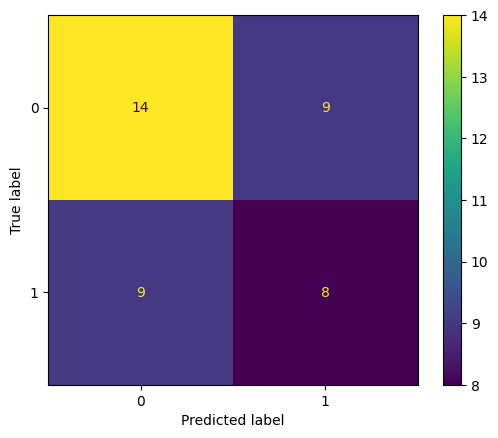

In [48]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 7, algorithm = 'ball_tree', leaf_size = 37, weights = 'uniform')
knn.fit(df_x, df_y)
predicao_knn = knn.predict(teste_x)

print(classification_report(teste_y, predicao_knn, target_names=list(le_y.classes_)))
ConfusionMatrixDisplay(confusion_matrix(teste_y, predicao_knn)).plot()

### Cross Validation com KFold e GridSearchCV

In [49]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

kf = KFold(n_splits=4, random_state=SEED, shuffle=True)
knn = KNeighborsClassifier()
parametros = {
    'n_neighbors': list(range(2, 11)),
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'leaf_size': list(range(15, 46))
}

melhor_fold = {}
melhor_acuracia = 0

for i, (train_index, test_index) in enumerate(kf.split(df_x)):
    print(f"--- Fold {i} ---")

    # Separando treino e teste de x e y
    train_x, test_x = df_x.iloc[train_index], df_x.iloc[test_index]
    train_y, test_y = df_y[train_index], df_y[test_index]

    # Aplicando GridSearchCV
    grid = GridSearchCV(estimator=knn, param_grid=parametros, scoring='accuracy')
    grid.fit(train_x, train_y)

    # Mostrando melhores parâmetros e acurácia
    print("Melhores hiperparâmetros:", grid.best_params_)
    print("Melhor acurácia:", grid.best_score_)

    if grid.best_score_ > melhor_acuracia:
        melhor_acuracia = grid.best_score_
        
        # Armazenando melhores parâmetros e acurácia
        melhor_fold['parametros'] = (grid.best_params_)
        melhor_fold['acuracia'] = (grid.best_score_)

        # Armazenando treino e teste
        melhor_fold['treino'] = ((train_x, train_y))
        melhor_fold['teste'] = ((test_x, test_y))

--- Fold 0 ---
Melhores hiperparâmetros: {'algorithm': 'ball_tree', 'leaf_size': 15, 'n_neighbors': 9, 'weights': 'distance'}
Melhor acurácia: 0.9409672830725462
--- Fold 1 ---
Melhores hiperparâmetros: {'algorithm': 'ball_tree', 'leaf_size': 15, 'n_neighbors': 9, 'weights': 'uniform'}
Melhor acurácia: 0.924466571834993
--- Fold 2 ---
Melhores hiperparâmetros: {'algorithm': 'auto', 'leaf_size': 15, 'n_neighbors': 6, 'weights': 'distance'}
Melhor acurácia: 0.9352773826458037
--- Fold 3 ---
Melhores hiperparâmetros: {'algorithm': 'auto', 'leaf_size': 15, 'n_neighbors': 10, 'weights': 'uniform'}
Melhor acurácia: 0.9300142247510669


In [50]:
melhor_fold['parametros']

{'algorithm': 'ball_tree',
 'leaf_size': 15,
 'n_neighbors': 9,
 'weights': 'distance'}

### Modelo com os melhores parâmetros e melhor fold

In [51]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = melhor_fold['parametros']['n_neighbors'], algorithm = melhor_fold['parametros']['algorithm'], leaf_size = melhor_fold['parametros']['leaf_size'], weights = melhor_fold['parametros']['weights'])
knn.fit(melhor_fold['treino'][0], melhor_fold['treino'][1])
predicao_knn = knn.predict(melhor_fold['teste'][0])

display(predicao_knn)

array([0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0])

In [52]:
from sklearn.metrics import *

print(classification_report(melhor_fold['teste'][1], predicao_knn, target_names=list(le_y.classes_)))

              precision    recall  f1-score   support

         Não       0.97      0.95      0.96        39
         Sim       0.92      0.96      0.94        23

    accuracy                           0.95        62
   macro avg       0.95      0.95      0.95        62
weighted avg       0.95      0.95      0.95        62



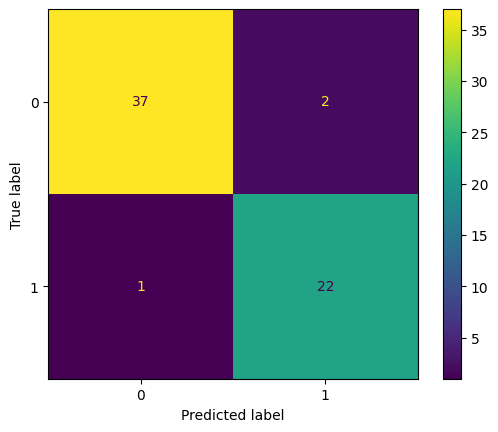

In [53]:
ConfusionMatrixDisplay(confusion_matrix(melhor_fold['teste'][1], predicao_knn)).plot()

É notável que todos os modelos estão tendo uma dificuldade maior em predizer os dados da classe 'Sim'. Por isso vamos testar usando SMOTE.

## Smote

### SMOTE na base toda

              precision    recall  f1-score   support

         Não       0.62      0.57      0.59        23
         Sim       0.47      0.53      0.50        17

    accuracy                           0.55        40
   macro avg       0.55      0.55      0.55        40
weighted avg       0.56      0.55      0.55        40



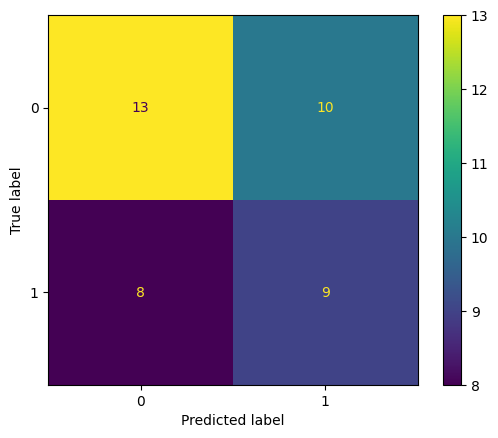

In [54]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import *

K = 5

smote = SMOTE()
x_refeito, y_refeito = smote.fit_resample(df_x_2, df_y_2)

# df_x, teste_x, df_y, teste_y = train_test_split(x_refeito, y_refeito, test_size=0.25, random_state=SEED)

knn = KNeighborsClassifier(n_neighbors = K)
knn.fit(df_x, df_y)
predicao_knn = knn.predict(teste_x)

print(classification_report(teste_y, predicao_knn, target_names=list(le_y.classes_)))
ConfusionMatrixDisplay(confusion_matrix(teste_y, predicao_knn)).plot()

Já é possível ver uma grande melhora, mas antes de tudo, vamos aplicar o Cross Validation

1.0
1.0
0.9876543209876543
0.9629629629629629


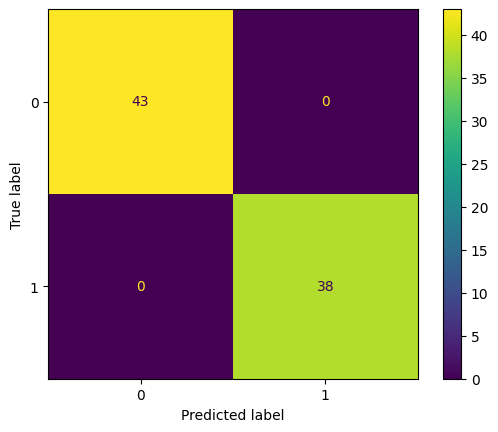

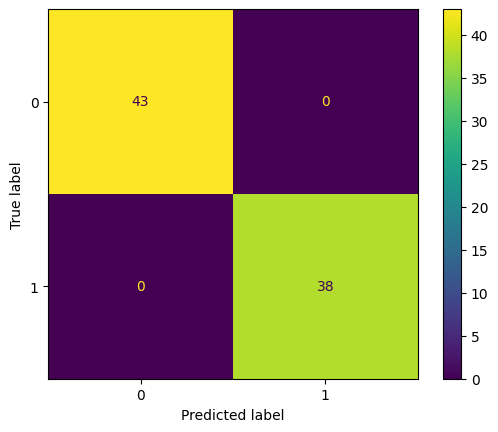

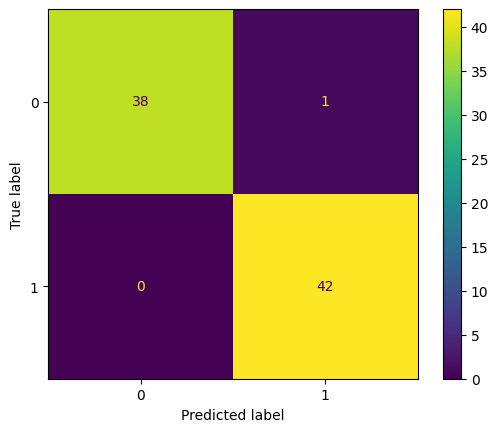

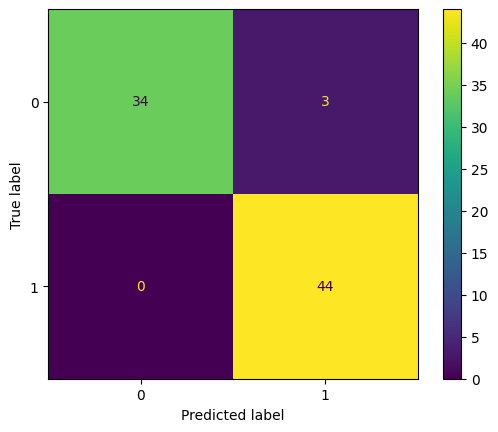

In [55]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

kf = KFold(n_splits=4, random_state=SEED, shuffle=True)
knn = KNeighborsClassifier(n_neighbors=K)

lista_acuracias = []
lista_precisions = []

for i, (train_index, test_index) in enumerate(kf.split(x_refeito)):
    # Separando treino e teste de x e y
    train_x, test_x = x_refeito.iloc[train_index], x_refeito.iloc[test_index]
    train_y, test_y = y_refeito[train_index], y_refeito[test_index]

    # Treinando o modelo
    knn.fit(train_x, train_y)

    # Predict
    predict = knn.predict(test_x)

    # Avaliando modelo
    lista_acuracias.append(accuracy_score(test_y, predict))
    lista_precisions.append(precision_score(test_y, predict))
    print(accuracy_score(test_y, predict))
    matriz_confusao = confusion_matrix(test_y, predict)
    matriz_confusao_display = ConfusionMatrixDisplay(matriz_confusao)
    matriz_confusao_display.plot()

Pelo fato do aplicativo possuir um nicho específico, aplicando o SMOTE apenas no treino condiz mais a um cenário real, em que a maioria dos dados novos não serão de possíveis usuários.

### SMOTE no treino

              precision    recall  f1-score   support

         Não       0.57      0.35      0.43        23
         Sim       0.42      0.65      0.51        17

    accuracy                           0.47        40
   macro avg       0.50      0.50      0.47        40
weighted avg       0.51      0.47      0.47        40



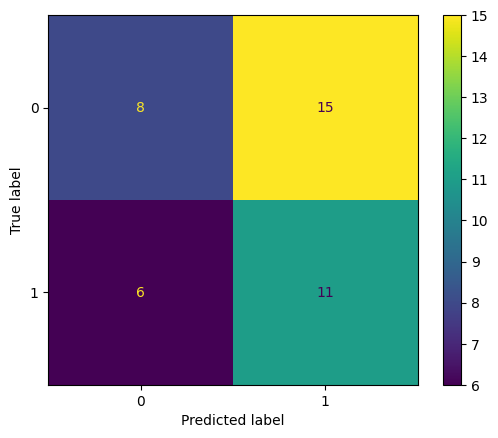

In [56]:
from imblearn.over_sampling import SMOTE

# df_x, teste_x, df_y, teste_y = train_test_split(df_x_2, df_y_2, test_size=0.25, random_state=SEED)

smote = SMOTE()
x_refeito, y_refeito = smote.fit_resample(df_x, df_y)

knn = KNeighborsClassifier(n_neighbors = K)
knn.fit(x_refeito, y_refeito)
predicao_knn = knn.predict(teste_x)

print(classification_report(teste_y, predicao_knn, target_names=list(le_y.classes_)))
ConfusionMatrixDisplay(confusion_matrix(teste_y, predicao_knn)).plot()

1.0
1.0
0.9838709677419355
0.9838709677419355


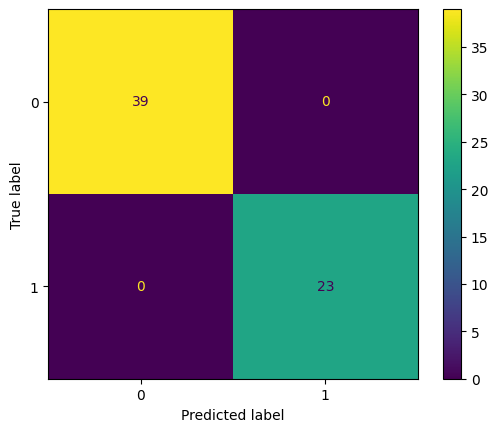

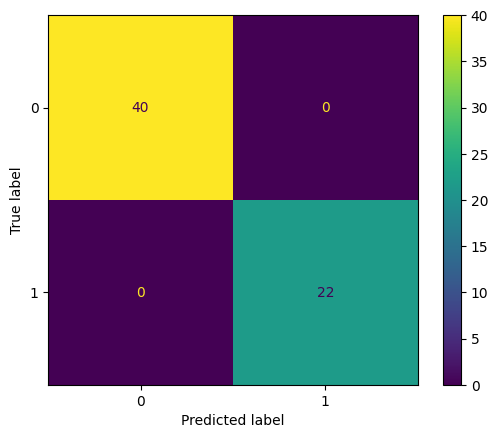

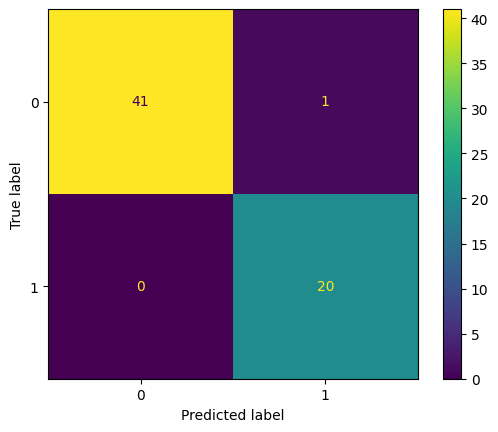

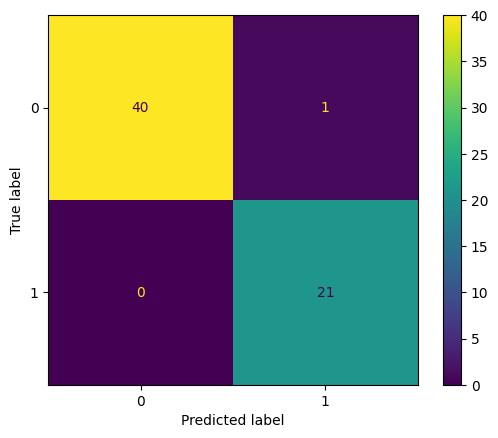

In [57]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

kf = KFold(n_splits=4, random_state=SEED, shuffle=True)
knn = KNeighborsClassifier(n_neighbors=K)

pior_fold = {}
pior_acuracia = 1

for i, (train_index, test_index) in enumerate(kf.split(df_x_2)):
    # Separando treino e teste de x e y
    train_x, test_x = df_x_2.iloc[train_index], df_x_2.iloc[test_index]
    train_y, test_y = df_y_2[train_index], df_y_2[test_index]

    smote = SMOTE()
    x_refeito, y_refeito = smote.fit_resample(train_x, train_y)

    # Treinando o modelo
    knn.fit(x_refeito, y_refeito)

    # Predict
    predict = knn.predict(test_x)

    # Avaliando modelo
    print(accuracy_score(test_y, predict))
    matriz_confusao = confusion_matrix(test_y, predict)
    matriz_confusao_display = ConfusionMatrixDisplay(matriz_confusao)
    matriz_confusao_display.plot()

    if accuracy_score(test_y, predict) <= pior_acuracia:
        pior_acuracia = accuracy_score(test_y, predict)
    
        # Armazenando treino e teste
        pior_fold['treino'] = ((x_refeito, y_refeito))
        pior_fold['teste'] = ((test_x, test_y))

    

Para que o modelo não fique com 100% de acurácia, utilizaremos o Fold com menor score

              precision    recall  f1-score   support

         Não       1.00      0.98      0.99        41
         Sim       0.95      1.00      0.98        21

    accuracy                           0.98        62
   macro avg       0.98      0.99      0.98        62
weighted avg       0.98      0.98      0.98        62



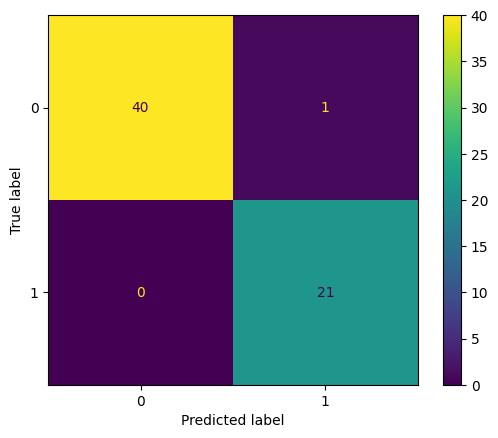

In [58]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = K)
knn.fit(pior_fold['treino'][0], pior_fold['treino'][1])
predicao_knn = knn.predict(pior_fold['teste'][0])

print(classification_report(pior_fold['teste'][1], predicao_knn, target_names=list(le_y.classes_)))
ConfusionMatrixDisplay(confusion_matrix(pior_fold['teste'][1], predicao_knn)).plot()

# Modelo supervisionado com KNN

## Importando bibliotecas

In [59]:
import pandas as pd
import numpy as np

## Treino

### Carregando dados

In [60]:
dados = pd.read_excel('dados_de_teste.xlsx')
dados.head()

,Em qual faixa etária você se encaixa?,Qual a renda per capita da sua casa?,Há quanto tempo você se interessa por arte?,Qual das opções de arte abaixo você mais gosta?,Com que frequência você vai aos museus?,Você já participou de algum curso ou atividade relacionada à arte?,Você segue artístas ou páginas relacionadas à arte nas rede sociais?,"Como é sua experiência ao visitar um museu normalmente? Caso nunca tenha visitado, selecione a que você acredita que seguiria.",Você já usou um aplicativo de um museu ou relacionado à arte?,O que mais te atrai em visitar museus ou exposições de arte?,Você sente falta de mais informações sobre as obras nos museus?,Você procura saber sobre essas informações faltantes?,De que forma você costuma buscar essas informações?,Você encontra o que precisa/esperava ao pesquisar?,Usaria o aplicativo?
0,Entre 46 e 59 anos,Classe A: superior a R$ 22 mil,Há mais de 10 anos,Arte digital,Ocasionalmente (máximo três vezes ao ano),Não,Sim,Sem um guia/planejamento para ver as obras.,Não,Apenas acompanho alguém,"Não, acredito que o que tem no museu é o sufic...",NaN,NaN,NaN,Não
1,Entre 36 e 45 anos,"Classe B: entre R$ 7,1 mil e R$ 22 mil",Há mais de 10 anos,Arte digital,Raramente (uma vez ao ano),Não,Não,Com um guia do próprio museu.,Não,Aprendizado,"Não, acredito que o que tem no museu é o sufic...",NaN,NaN,NaN,Não
2,Menos de 18 anos,"Classes D/E: até R$ 2,9 mil",Não me interesso,Fotografia,Nunca,Não,Não,Sem um guia/planejamento para ver as obras.,Não,Não visito,NaN,NaN,NaN,NaN,Não
3,Entre 18 e 24 anos,Classe A: superior a R$ 22 mil,De 2 a 4 anos,Arte de rua/grafite,Ocasionalmente (máximo três vezes ao ano),Não,Sim,Sem um guia/planejamento para ver as obras.,Não,Apenas acompanho alguém,"Sim, sinto falta de mais informações","Não, apenas me conformo",NaN,NaN,Não
4,Entre 46 e 59 anos,"Classe B: entre R$ 7,1 mil e R$ 22 mil",De 5 a 9 anos,Arte digital,Raramente (uma vez ao ano),Sim,Não,"Utilizo o planejamento de terceiros (sites, bl...",Sim,Não visito,NaN,NaN,NaN,NaN,Não


In [61]:
dados.describe()

,Em qual faixa etária você se encaixa?,Qual a renda per capita da sua casa?,Há quanto tempo você se interessa por arte?,Qual das opções de arte abaixo você mais gosta?,Com que frequência você vai aos museus?,Você já participou de algum curso ou atividade relacionada à arte?,Você segue artístas ou páginas relacionadas à arte nas rede sociais?,"Como é sua experiência ao visitar um museu normalmente? Caso nunca tenha visitado, selecione a que você acredita que seguiria.",Você já usou um aplicativo de um museu ou relacionado à arte?,O que mais te atrai em visitar museus ou exposições de arte?,Você sente falta de mais informações sobre as obras nos museus?,Você procura saber sobre essas informações faltantes?,De que forma você costuma buscar essas informações?,Você encontra o que precisa/esperava ao pesquisar?,Usaria o aplicativo?
count,40,40,40,35,35,35,35,35,35,35,31,20,14,14,40
unique,6,4,6,6,5,2,2,4,2,5,2,2,5,2,2
top,Entre 18 e 24 anos,Classe A: superior a R$ 22 mil,Há mais de 10 anos,Fotografia,Ocasionalmente (máximo três vezes ao ano),Não,Não,Sem um guia/planejamento para ver as obras.,Não,Lazer,"Sim, sinto falta de mais informações","Sim, procuro","Busca em navegadores (Google, Yahoo, Edge, Ope...",Não,Não
freq,12,16,9,7,8,20,18,12,28,11,20,14,5,8,23


### Tratando dados de treino

#### Nulos

In [62]:
dados.fillna({'Qual das opções de arte abaixo você mais gosta?': 'Não se interessa por arte', 'Com que frequência você vai aos museus?': 'Não se interessa por arte', 'Você já participou de algum curso ou atividade relacionada à arte?': 'Não se interessa por arte', 'Você segue artístas ou páginas relacionadas à arte nas rede sociais?': 'Não se interessa por arte', 'Como é sua experiência ao visitar um museu normalmente? Caso nunca tenha visitado, selecione a que você acredita que seguiria.': 'Não se interessa por arte', 'Você já usou um aplicativo de um museu ou relacionado à arte?': 'Não se interessa por arte', 'O que mais te atrai em visitar museus ou exposições de arte?': 'Não se interessa por arte'}, inplace=True)
dados.fillna({'Você sente falta de mais informações sobre as obras nos museus?': 'Não vai a museus'}, inplace=True)
dados.fillna({'Você procura saber sobre essas informações faltantes?': 'Não sente falta de informações'}, inplace=True)
dados.fillna({'De que forma você costuma buscar essas informações?': 'Não procura essas informações', 'Você encontra o que precisa/esperava ao pesquisar?': 'Não procura essas informações'}, inplace=True)

dados.isna().sum()

Em qual faixa etária você se encaixa?                                                                                             0
Qual a renda per capita da sua casa?                                                                                              0
Há quanto tempo você se interessa por arte?                                                                                       0
Qual das opções de arte abaixo você mais gosta?                                                                                   0
Com que frequência você vai aos museus?                                                                                           0
Você já participou de algum curso ou atividade relacionada à arte?                                                                0
Você segue artístas ou páginas relacionadas à arte nas rede sociais?                                                              0
Como é sua experiência ao visitar um museu normalmente? Caso nunca tenha vis

#### Atributo e resposta

In [63]:
df_y, df_x = dados['Usaria o aplicativo?'], dados.drop(columns=['Usaria o aplicativo?'])
display(df_x.head())
display(df_y.head())

,Em qual faixa etária você se encaixa?,Qual a renda per capita da sua casa?,Há quanto tempo você se interessa por arte?,Qual das opções de arte abaixo você mais gosta?,Com que frequência você vai aos museus?,Você já participou de algum curso ou atividade relacionada à arte?,Você segue artístas ou páginas relacionadas à arte nas rede sociais?,"Como é sua experiência ao visitar um museu normalmente? Caso nunca tenha visitado, selecione a que você acredita que seguiria.",Você já usou um aplicativo de um museu ou relacionado à arte?,O que mais te atrai em visitar museus ou exposições de arte?,Você sente falta de mais informações sobre as obras nos museus?,Você procura saber sobre essas informações faltantes?,De que forma você costuma buscar essas informações?,Você encontra o que precisa/esperava ao pesquisar?
0,Entre 46 e 59 anos,Classe A: superior a R$ 22 mil,Há mais de 10 anos,Arte digital,Ocasionalmente (máximo três vezes ao ano),Não,Sim,Sem um guia/planejamento para ver as obras.,Não,Apenas acompanho alguém,"Não, acredito que o que tem no museu é o sufic...",Não sente falta de informações,Não procura essas informações,Não procura essas informações
1,Entre 36 e 45 anos,"Classe B: entre R$ 7,1 mil e R$ 22 mil",Há mais de 10 anos,Arte digital,Raramente (uma vez ao ano),Não,Não,Com um guia do próprio museu.,Não,Aprendizado,"Não, acredito que o que tem no museu é o sufic...",Não sente falta de informações,Não procura essas informações,Não procura essas informações
2,Menos de 18 anos,"Classes D/E: até R$ 2,9 mil",Não me interesso,Fotografia,Nunca,Não,Não,Sem um guia/planejamento para ver as obras.,Não,Não visito,Não vai a museus,Não sente falta de informações,Não procura essas informações,Não procura essas informações
3,Entre 18 e 24 anos,Classe A: superior a R$ 22 mil,De 2 a 4 anos,Arte de rua/grafite,Ocasionalmente (máximo três vezes ao ano),Não,Sim,Sem um guia/planejamento para ver as obras.,Não,Apenas acompanho alguém,"Sim, sinto falta de mais informações","Não, apenas me conformo",Não procura essas informações,Não procura essas informações
4,Entre 46 e 59 anos,"Classe B: entre R$ 7,1 mil e R$ 22 mil",De 5 a 9 anos,Arte digital,Raramente (uma vez ao ano),Sim,Não,"Utilizo o planejamento de terceiros (sites, bl...",Sim,Não visito,Não vai a museus,Não sente falta de informações,Não procura essas informações,Não procura essas informações


0    Não
1    Não
2    Não
3    Não
4    Não
Name: Usaria o aplicativo?, dtype: object

#### Transformando em númerico com pesos

In [64]:
mapeamento_tipo_arte = {'Não se interessa por arte': 0, 'Pintura': 8, 'Fotografia': 8, 'Escultura': 6, 'Arquitetura e Urbanismo': 5, 'Arte digital': 4,'Arte de rua/grafite': 3}
mapeamento_frequencia = {'Não se interessa por arte': 0, 'Frequentemente (máximo cinco vezes ao ano)': 10,'Muito frequentemente (mais de cinco vezes ao ano)': 9,'Ocasionalmente (máximo três vezes ao ano)': 8,'Raramente (uma vez ao ano)': 5,'Nunca': 1}
mapeamento_guia = {'Não se interessa por arte': 0, 'Planejo minha rota antes.': 10, 'Utilizo o planejamento de terceiros (sites, blogs, páginas em redes sociais que disponibilizam).': 9, 'Com um guia do próprio museu.': 8, 'Sem um guia/planejamento para ver as obras.': 2}
mapeamento_motivo = {'Não se interessa por arte': 0, 'Aprendizado': 10, 'Inspiração': 9, 'Lazer': 6, 'Apenas acompanho alguém': 3, 'Não visito': 1}
mapeamento_falta_info = {'Não vai a museus': 1, 'Sim, sinto falta de mais informações': 8, 'Não, acredito que o que tem no museu é o suficiente': 2}
mapeamento_procurar_info = {'Não sente falta de informações': 1, 'Sim, procuro': 7, 'Não, apenas me conformo': 3}
mapeamento_achar_info = {'Não procura essas informações': 1, 'Sim': 3, 'Não': 8}
mapeamento = {'Qual das opções de arte abaixo você mais gosta?': mapeamento_tipo_arte, 'Com que frequência você vai aos museus?': mapeamento_frequencia, 'Como é sua experiência ao visitar um museu normalmente? Caso nunca tenha visitado, selecione a que você acredita que seguiria.': mapeamento_guia, 'O que mais te atrai em visitar museus ou exposições de arte?': mapeamento_motivo, 'Você sente falta de mais informações sobre as obras nos museus?': mapeamento_falta_info, 'Você procura saber sobre essas informações faltantes?': mapeamento_procurar_info, 'Você encontra o que precisa/esperava ao pesquisar?': mapeamento_achar_info}

label_encoder = {}

for i in df_x:
    if df_x[i].dtype == object:
        if i in mapeamento.keys():
            df_x[i] = df_x[i].map(mapeamento[i])
        else:
            dicio_unicos = {}
            unicos = list(df_x[i].unique())
            for k, v in enumerate(unicos):
                dicio_unicos[v] = k
            df_x[i] = df_x[i].map(dicio_unicos)
            label_encoder[i] = dicio_unicos

mapeamento_usaria_app = {'Sim': 1, 'Não': 0}
df_y = df_y.map(mapeamento_usaria_app)

#### Normalizando

In [65]:
from sklearn.preprocessing import StandardScaler

colunas = df_x.columns

ss = StandardScaler()
df_x = ss.fit_transform(df_x)
pd.DataFrame(df_x, columns=colunas)

,Em qual faixa etária você se encaixa?,Qual a renda per capita da sua casa?,Há quanto tempo você se interessa por arte?,Qual das opções de arte abaixo você mais gosta?,Com que frequência você vai aos museus?,Você já participou de algum curso ou atividade relacionada à arte?,Você segue artístas ou páginas relacionadas à arte nas rede sociais?,"Como é sua experiência ao visitar um museu normalmente? Caso nunca tenha visitado, selecione a que você acredita que seguiria.",Você já usou um aplicativo de um museu ou relacionado à arte?,O que mais te atrai em visitar museus ou exposições de arte?,Você sente falta de mais informações sobre as obras nos museus?,Você procura saber sobre essas informações faltantes?,De que forma você costuma buscar essas informações?,Você encontra o que precisa/esperava ao pesquisar?
0,-1.474021,-1.040833,-1.323959,-0.402891,0.613536,-0.898027,-1.032094,-0.981645,-0.604450,-0.754378,-0.855391,-0.879883,-0.594737,-0.620339
1,-0.788430,-0.240192,-1.323959,-0.402891,-0.195522,-0.898027,0.442326,0.599528,-0.604450,1.201417,-0.855391,-0.879883,-0.594737,-0.620339
2,-0.102839,0.560449,-0.678125,1.096238,-1.274267,-0.898027,0.442326,-0.981645,-0.604450,-1.313177,-1.163640,-0.879883,-0.594737,-0.620339
3,0.582752,-1.040833,-0.032292,-0.777673,0.613536,-0.898027,-1.032094,-0.981645,-0.604450,-0.754378,0.994103,-0.146647,-0.594737,-0.620339
4,-1.474021,-0.240192,0.613542,-0.402891,-0.195522,0.538816,0.442326,0.863057,0.817786,-1.313177,-1.163640,-0.879883,-0.594737,-0.620339
5,-0.788430,0.560449,1.259376,-0.777673,1.152908,0.538816,0.442326,-0.981645,0.817786,1.201417,0.994103,1.319824,0.066082,0.109472
6,0.582752,0.560449,-0.678125,-0.402891,1.152908,-0.898027,0.442326,-0.981645,-0.604450,0.083820,-0.855391,-0.879883,-0.594737,-0.620339
7,-1.474021,1.361089,-1.323959,0.346674,-0.195522,-0.898027,0.442326,-0.981645,-0.604450,1.201417,0.994103,1.319824,0.066082,0.109472
8,-0.102839,1.361089,1.259376,1.096238,0.883222,0.538816,0.442326,0.863057,-0.604450,0.922018,0.994103,-0.146647,-0.594737,-0.620339
9,-1.474021,-1.040833,0.613542,1.096238,1.152908,-0.898027,0.442326,0.599528,0.817786,1.201417,-0.855391,-0.879883,-0.594737,-0.620339


#### PCA

In [66]:
from sklearn.decomposition import PCA

pca = PCA()
df_x = pca.fit_transform(df_x)
df_x = pd.DataFrame(df_x, columns=colunas)
df_x

,Em qual faixa etária você se encaixa?,Qual a renda per capita da sua casa?,Há quanto tempo você se interessa por arte?,Qual das opções de arte abaixo você mais gosta?,Com que frequência você vai aos museus?,Você já participou de algum curso ou atividade relacionada à arte?,Você segue artístas ou páginas relacionadas à arte nas rede sociais?,"Como é sua experiência ao visitar um museu normalmente? Caso nunca tenha visitado, selecione a que você acredita que seguiria.",Você já usou um aplicativo de um museu ou relacionado à arte?,O que mais te atrai em visitar museus ou exposições de arte?,Você sente falta de mais informações sobre as obras nos museus?,Você procura saber sobre essas informações faltantes?,De que forma você costuma buscar essas informações?,Você encontra o que precisa/esperava ao pesquisar?
0,-1.156307,-2.214837,-1.469837,-0.632643,-0.335326,-0.513784,-1.380105,-0.217847,-0.447972,0.111427,-0.140905,-0.012829,-0.413717,-0.160627
1,-0.573876,-1.573839,-0.527665,-1.362111,0.041717,0.420655,0.096042,0.618772,1.305835,-0.312318,-0.262134,-0.759517,0.193545,-0.225371
2,-1.657357,-1.391032,1.225879,-1.080011,0.309245,-0.547145,0.067392,-0.191830,-1.271522,-0.973829,-0.354279,0.009286,0.168676,0.160721
3,-0.067718,-1.137739,-0.164123,1.281807,-0.613195,-0.049134,-1.899486,0.289296,-0.366201,0.137053,0.153926,0.579617,0.594394,-0.134903
4,-1.821460,-0.249829,-0.865882,0.061037,0.047214,-1.427882,1.218768,-1.064109,0.430687,0.389949,0.209120,-0.234455,0.257865,0.055641
5,0.781168,1.781175,-0.760568,0.213075,-2.343034,0.418565,0.119862,0.224940,0.217277,0.458691,0.021268,0.278628,-0.190530,0.505365
6,-0.891606,-1.463608,0.543753,-0.275709,-0.977374,1.435548,-0.554227,-0.441085,-0.134960,0.058065,0.029351,-0.579538,-0.047355,0.021993
7,1.050514,0.385586,0.052391,-2.556705,-1.279234,0.146527,-0.838838,0.832663,-0.252208,-0.082929,-1.144564,0.060293,0.232351,0.415741
8,1.273590,-0.177269,1.025246,0.234805,-1.245141,0.017155,1.840867,0.273467,0.189606,1.130954,-0.602401,-0.054698,0.381680,-0.158282
9,0.034609,-1.620824,-1.515634,-0.540035,-0.933935,0.214889,1.902148,-0.273494,0.862889,-0.350039,0.521542,0.942255,-0.160878,-0.017483


### Visualizando modelo

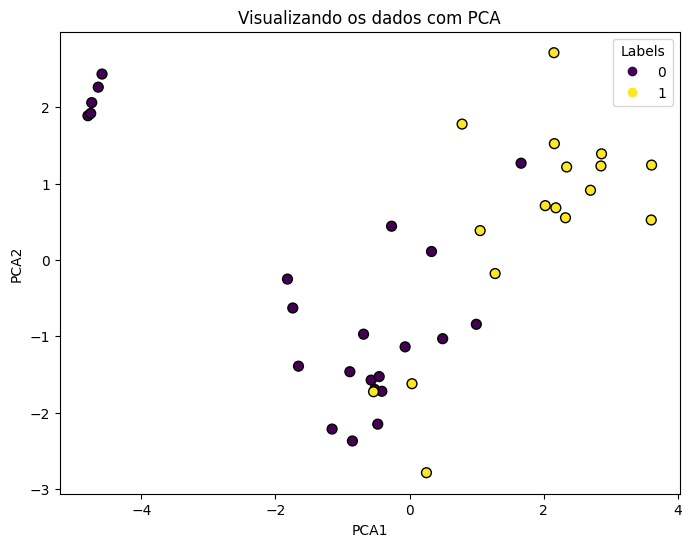

In [67]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca_visu = PCA(n_components=2)
principal_components = pca_visu.fit_transform(df_x)

x_pca = pd.DataFrame(principal_components, columns=['PCA1', 'PCA2'])

plt.figure(figsize=(8,6))
scatter = plt.scatter(x_pca['PCA1'], x_pca['PCA2'], c=df_y, edgecolor='k', s=50, cmap='viridis')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.title('Visualizando os dados com PCA')
plt.legend(*scatter.legend_elements(), title="Labels")
plt.show()

## Teste

### Carregando dados de teste

In [68]:
dados_teste = pd.read_excel('Leontis.xlsx')
dados_teste.head()

,ID,Hora de início,Hora de conclusão,E-mail,Nome,Hora da última modificação,Em qual faixa etária você se encaixa?,Com qual gênero você se identifica?,Qual seu nível de formação atual?,Qual a renda per capita da sua casa? (A renda per capita é calculada somando a renda de cada indivíduo da casa e dividindo pela quantidade de pessoas),...,Com que frequência você vai aos museus?,Você já participou de algum curso ou atividade relacionada à arte?,Você segue artístas ou páginas relacionadas à arte nas rede sociais?,"Como é sua experiência ao visitar um museu normalmente? Caso nunca tenha visitado, selecione a que você acredita que seguiria.",Você já usou um aplicativo de um museu ou relacionado à arte?,O que mais te atrai em visitar museus ou exposições de arte?,Você sente falta de mais informações sobre as obras nos museus?,Você procura saber sobre essas informações faltantes?,De que forma você costuma buscar essas informações?,Você encontra o que precisa/esperava ao pesquisar?
0,1,2024-08-16 11:18:14,2024-08-16 11:20:21,anonymous,NaN,NaN,Menos de 18 anos,Masculino,Cursando ensino médio,"Classes D/E: até R$ 2,9 mil",...,Raramente (uma vez ao ano),Não,Sim,Sem um guia/planejamento para ver as obras.,Não,Lazer,"Sim, sinto falta de mais informações","Sim, procuro","Busca em navegadores (Google, Yahoo, Edge, Ope...",Não
1,2,2024-08-16 12:18:44,2024-08-16 12:19:31,anonymous,NaN,NaN,Entre 25 e 35 anos,Feminino,Ensino superior concluído,"Classe C: entre R$ 2,9 mil e R$ 7,1 mil",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,2024-08-16 12:19:26,2024-08-16 12:20:28,anonymous,NaN,NaN,Menos de 18 anos,Feminino,Cursando ensino médio,"Classe C: entre R$ 2,9 mil e R$ 7,1 mil",...,Ocasionalmente (máximo três vezes ao ano),Sim,Sim,Sem um guia/planejamento para ver as obras.,Não,Aprendizado,"Não, acredito que o que tem no museu é o sufic...",NaN,NaN,NaN
3,4,2024-08-16 12:19:24,2024-08-16 12:20:34,anonymous,NaN,NaN,Menos de 18 anos,Masculino,Cursando ensino médio,"Classe B: entre R$ 7,1 mil e R$ 22 mil",...,Ocasionalmente (máximo três vezes ao ano),Não,Sim,Sem um guia/planejamento para ver as obras.,Não,Lazer,"Sim, sinto falta de mais informações","Não, apenas me conformo",NaN,NaN
4,5,2024-08-16 12:19:43,2024-08-16 12:21:36,anonymous,NaN,NaN,Entre 46 e 59 anos,Masculino,Ensino superior concluído,Classe A: superior a R$ 22 mil,...,Muito frequentemente (mais de cinco vezes ao ano),Sim,Não,Planejo minha rota antes.,Sim,Inspiração,"Sim, sinto falta de mais informações","Não, apenas me conformo",NaN,NaN


In [69]:
dados_teste.head()

,ID,Hora de início,Hora de conclusão,E-mail,Nome,Hora da última modificação,Em qual faixa etária você se encaixa?,Com qual gênero você se identifica?,Qual seu nível de formação atual?,Qual a renda per capita da sua casa? (A renda per capita é calculada somando a renda de cada indivíduo da casa e dividindo pela quantidade de pessoas),...,Com que frequência você vai aos museus?,Você já participou de algum curso ou atividade relacionada à arte?,Você segue artístas ou páginas relacionadas à arte nas rede sociais?,"Como é sua experiência ao visitar um museu normalmente? Caso nunca tenha visitado, selecione a que você acredita que seguiria.",Você já usou um aplicativo de um museu ou relacionado à arte?,O que mais te atrai em visitar museus ou exposições de arte?,Você sente falta de mais informações sobre as obras nos museus?,Você procura saber sobre essas informações faltantes?,De que forma você costuma buscar essas informações?,Você encontra o que precisa/esperava ao pesquisar?
0,1,2024-08-16 11:18:14,2024-08-16 11:20:21,anonymous,NaN,NaN,Menos de 18 anos,Masculino,Cursando ensino médio,"Classes D/E: até R$ 2,9 mil",...,Raramente (uma vez ao ano),Não,Sim,Sem um guia/planejamento para ver as obras.,Não,Lazer,"Sim, sinto falta de mais informações","Sim, procuro","Busca em navegadores (Google, Yahoo, Edge, Ope...",Não
1,2,2024-08-16 12:18:44,2024-08-16 12:19:31,anonymous,NaN,NaN,Entre 25 e 35 anos,Feminino,Ensino superior concluído,"Classe C: entre R$ 2,9 mil e R$ 7,1 mil",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,2024-08-16 12:19:26,2024-08-16 12:20:28,anonymous,NaN,NaN,Menos de 18 anos,Feminino,Cursando ensino médio,"Classe C: entre R$ 2,9 mil e R$ 7,1 mil",...,Ocasionalmente (máximo três vezes ao ano),Sim,Sim,Sem um guia/planejamento para ver as obras.,Não,Aprendizado,"Não, acredito que o que tem no museu é o sufic...",NaN,NaN,NaN
3,4,2024-08-16 12:19:24,2024-08-16 12:20:34,anonymous,NaN,NaN,Menos de 18 anos,Masculino,Cursando ensino médio,"Classe B: entre R$ 7,1 mil e R$ 22 mil",...,Ocasionalmente (máximo três vezes ao ano),Não,Sim,Sem um guia/planejamento para ver as obras.,Não,Lazer,"Sim, sinto falta de mais informações","Não, apenas me conformo",NaN,NaN
4,5,2024-08-16 12:19:43,2024-08-16 12:21:36,anonymous,NaN,NaN,Entre 46 e 59 anos,Masculino,Ensino superior concluído,Classe A: superior a R$ 22 mil,...,Muito frequentemente (mais de cinco vezes ao ano),Sim,Não,Planejo minha rota antes.,Sim,Inspiração,"Sim, sinto falta de mais informações","Não, apenas me conformo",NaN,NaN


### Tratando dados de teste

In [70]:
dados_teste = dados_teste.drop(columns=['ID', 'Hora de início', 'Hora de conclusão', 'E-mail', 'Nome',
       'Hora da última modificação', 'Com qual gênero você se identifica?', 'Qual seu nível de formação atual?'])
dados_teste.columns

Index(['Em qual faixa etária você se encaixa?',
       'Qual a renda per capita da sua casa? (A renda per capita é calculada somando a renda de cada indivíduo da casa e dividindo pela quantidade de pessoas)',
       'Há quanto tempo você se interessa por arte?',
       'Qual das opções de arte abaixo você mais gosta?',
       'Com que frequência você vai aos museus?',
       'Você já participou de algum curso ou atividade relacionada à arte?',
       'Você segue artístas ou páginas relacionadas à arte nas rede sociais?',
       'Como é sua experiência ao visitar um museu normalmente? Caso nunca tenha visitado, selecione a que você acredita que seguiria.',
       'Você já usou um aplicativo de um museu ou relacionado à arte?',
       'O que mais te atrai em visitar museus ou exposições de arte?',
       'Você sente falta de mais informações sobre as obras nos museus?',
       'Você procura saber sobre essas informações faltantes?',
       'De que forma você costuma buscar essas informaç

In [71]:
colunas_dados = dados_teste.columns
dados_teste.rename(columns={colunas_dados[1]: 'Qual a renda per capita da sua casa?'}, inplace = True)

#### Nulos

In [72]:
dados_teste.fillna({'Qual das opções de arte abaixo você mais gosta?': 'Não se interessa por arte', 'Com que frequência você vai aos museus?': 'Não se interessa por arte', 'Você já participou de algum curso ou atividade relacionada à arte?': 'Não se interessa por arte', 'Você segue artístas ou páginas relacionadas à arte nas rede sociais?': 'Não se interessa por arte', 'Como é sua experiência ao visitar um museu normalmente? Caso nunca tenha visitado, selecione a que você acredita que seguiria.': 'Não se interessa por arte', 'Você já usou um aplicativo de um museu ou relacionado à arte?': 'Não se interessa por arte', 'O que mais te atrai em visitar museus ou exposições de arte?': 'Não se interessa por arte'}, inplace=True)
dados_teste.fillna({'Você sente falta de mais informações sobre as obras nos museus?': 'Não vai a museus'}, inplace=True)
dados_teste.fillna({'Você procura saber sobre essas informações faltantes?': 'Não sente falta de informações'}, inplace=True)
dados_teste.fillna({'De que forma você costuma buscar essas informações?': 'Não procura essas informações', 'Você encontra o que precisa/esperava ao pesquisar?': 'Não procura essas informações'}, inplace=True)

dados_teste.isna().sum()

Em qual faixa etária você se encaixa?                                                                                             0
Qual a renda per capita da sua casa?                                                                                              0
Há quanto tempo você se interessa por arte?                                                                                       0
Qual das opções de arte abaixo você mais gosta?                                                                                   0
Com que frequência você vai aos museus?                                                                                           0
Você já participou de algum curso ou atividade relacionada à arte?                                                                0
Você segue artístas ou páginas relacionadas à arte nas rede sociais?                                                              0
Como é sua experiência ao visitar um museu normalmente? Caso nunca tenha vis

#### Atributo e resposta

In [73]:
df_x_teste = dados_teste
display(df_x_teste.head())

,Em qual faixa etária você se encaixa?,Qual a renda per capita da sua casa?,Há quanto tempo você se interessa por arte?,Qual das opções de arte abaixo você mais gosta?,Com que frequência você vai aos museus?,Você já participou de algum curso ou atividade relacionada à arte?,Você segue artístas ou páginas relacionadas à arte nas rede sociais?,"Como é sua experiência ao visitar um museu normalmente? Caso nunca tenha visitado, selecione a que você acredita que seguiria.",Você já usou um aplicativo de um museu ou relacionado à arte?,O que mais te atrai em visitar museus ou exposições de arte?,Você sente falta de mais informações sobre as obras nos museus?,Você procura saber sobre essas informações faltantes?,De que forma você costuma buscar essas informações?,Você encontra o que precisa/esperava ao pesquisar?
0,Menos de 18 anos,"Classes D/E: até R$ 2,9 mil",Menos de 2 anos,Fotografia,Raramente (uma vez ao ano),Não,Sim,Sem um guia/planejamento para ver as obras.,Não,Lazer,"Sim, sinto falta de mais informações","Sim, procuro","Busca em navegadores (Google, Yahoo, Edge, Ope...",Não
1,Entre 25 e 35 anos,"Classe C: entre R$ 2,9 mil e R$ 7,1 mil",Não me interesso,Não se interessa por arte,Não se interessa por arte,Não se interessa por arte,Não se interessa por arte,Não se interessa por arte,Não se interessa por arte,Não se interessa por arte,Não vai a museus,Não sente falta de informações,Não procura essas informações,Não procura essas informações
2,Menos de 18 anos,"Classe C: entre R$ 2,9 mil e R$ 7,1 mil",De 2 a 4 anos,Escultura,Ocasionalmente (máximo três vezes ao ano),Sim,Sim,Sem um guia/planejamento para ver as obras.,Não,Aprendizado,"Não, acredito que o que tem no museu é o sufic...",Não sente falta de informações,Não procura essas informações,Não procura essas informações
3,Menos de 18 anos,"Classe B: entre R$ 7,1 mil e R$ 22 mil",Estou iniciando agora,Pintura,Ocasionalmente (máximo três vezes ao ano),Não,Sim,Sem um guia/planejamento para ver as obras.,Não,Lazer,"Sim, sinto falta de mais informações","Não, apenas me conformo",Não procura essas informações,Não procura essas informações
4,Entre 46 e 59 anos,Classe A: superior a R$ 22 mil,Há mais de 10 anos,Fotografia,Muito frequentemente (mais de cinco vezes ao ano),Sim,Não,Planejo minha rota antes.,Sim,Inspiração,"Sim, sinto falta de mais informações","Não, apenas me conformo",Não procura essas informações,Não procura essas informações


#### Transformando em númerico com pesos

In [74]:
dados_teste.fillna({'Qual das opções de arte abaixo você mais gosta?': 'Não se interessa por arte', 'Com que frequência você vai aos museus?': 'Não se interessa por arte', 'Você já participou de algum curso ou atividade relacionada à arte?': 'Não se interessa por arte', 'Você segue artístas ou páginas relacionadas à arte nas rede sociais?': 'Não se interessa por arte', 'Como é sua experiência ao visitar um museu normalmente? Caso nunca tenha visitado, selecione a que você acredita que seguiria.': 'Não se interessa por arte', 'Você já usou um aplicativo de um museu ou relacionado à arte?': 'Não se interessa por arte', 'O que mais te atrai em visitar museus ou exposições de arte?': 'Não se interessa por arte'}, inplace=True)
dados_teste.fillna({'Você sente falta de mais informações sobre as obras nos museus?': 'Não vai a museus'}, inplace=True)
dados_teste.fillna({'Você procura saber sobre essas informações faltantes?': 'Não sente falta de informações'}, inplace=True)
dados_teste.fillna({'De que forma você costuma buscar essas informações?': 'Não procura essas informações', 'Você encontra o que precisa/esperava ao pesquisar?': 'Não procura essas informações'}, inplace=True)

mapeamento_tipo_arte = {'Não se interessa por arte': 0, 'Pintura': 8, 'Fotografia': 8, 'Escultura': 6, 'Arquitetura e Urbanismo': 5, 'Arte digital': 4,'Arte de rua/grafite': 3}
mapeamento_frequencia = {'Não se interessa por arte': 0, 'Frequentemente (máximo cinco vezes ao ano)': 10,'Muito frequentemente (mais de cinco vezes ao ano)': 9,'Ocasionalmente (máximo três vezes ao ano)': 8,'Raramente (uma vez ao ano)': 5,'Nunca': 1}
mapeamento_guia = {'Não se interessa por arte': 0, 'Planejo minha rota antes.': 10, 'Utilizo o planejamento de terceiros (sites, blogs, páginas em redes sociais que disponibilizam).': 9, 'Com um guia do próprio museu.': 8, 'Sem um guia/planejamento para ver as obras.': 2}
mapeamento_motivo = {'Não se interessa por arte': 0, 'Aprendizado': 10, 'Inspiração': 9, 'Lazer': 6, 'Apenas acompanho alguém': 3, 'Não visito': 1}
mapeamento_falta_info = {'Não vai a museus': 1, 'Sim, sinto falta de mais informações': 10, 'Não, acredito que o que tem no museu é o suficiente': 4}
mapeamento_procurar_info = {'Não sente falta de informações': 3, 'Sim, procuro': 10, 'Não, apenas me conformo': 5}
mapeamento_achar_info = {'Não procura essas informações': 3, 'Sim': 4, 'Não': 10}
mapeamento = {'Qual das opções de arte abaixo você mais gosta?': mapeamento_tipo_arte, 'Com que frequência você vai aos museus?': mapeamento_frequencia, 'Como é sua experiência ao visitar um museu normalmente? Caso nunca tenha visitado, selecione a que você acredita que seguiria.': mapeamento_guia, 'O que mais te atrai em visitar museus ou exposições de arte?': mapeamento_motivo, 'Você sente falta de mais informações sobre as obras nos museus?': mapeamento_falta_info, 'Você procura saber sobre essas informações faltantes?': mapeamento_procurar_info, 'Você encontra o que precisa/esperava ao pesquisar?': mapeamento_achar_info}

mapeamento_geral = {'Em qual faixa etária você se encaixa?': {'Menos de 18 anos': 0,
'Entre 25 e 35 anos': 1,
'Entre 46 e 59 anos': 2,
'Entre 36 e 45 anos': 3,
'Entre 18 e 24 anos': 4,
'60+ anos': 5},
'Qual a renda per capita da sua casa?': {'Classes D/E: até R$ 2,9 mil': 0,
'Classe C: entre R$ 2,9 mil e R$ 7,1 mil': 1,
'Classe B: entre R$ 7,1 mil e R$ 22 mil': 2,
'Classe A: superior a R$ 22 mil': 3},
'Há quanto tempo você se interessa por arte?': {'Menos de 2 anos': 0,
'Não me interesso': 1,
'De 2 a 4 anos': 2,
'Estou iniciando agora': 3,
'Há mais de 10 anos': 4,
'De 5 a 9 anos': 5},
'Você já participou de algum curso ou atividade relacionada à arte?': {'Não': 0,
'Não se interessa por arte': 1,
'Sim': 2},
'Você segue artístas ou páginas relacionadas à arte nas rede sociais?': {'Sim': 0,
'Não se interessa por arte': 1,
'Não': 2},
'Você já usou um aplicativo de um museu ou relacionado à arte?': {'Não': 0,
'Não se interessa por arte': 1,
'Sim': 2},
'De que forma você costuma buscar essas informações?': {'Busca em navegadores (Google, Yahoo, Edge, Opera, Fox, entre outros)': 0,
'Não procura essas informações': 1,
'Aplicativos': 2,
'Busca em inteligências artificiais (ChatGPT, Gemini, entre outros)': 3,
'Redes sociais': 4,
'Blogs favoritos': 5,
'Livros': 6}}

print(dados_teste.columns)

for i in df_x_teste:
    if df_x_teste[i].dtype == object:
        if i in mapeamento.keys():
            df_x_teste[i] = df_x_teste[i].map(mapeamento[i])
        else:
            df_x_teste[i] = df_x_teste[i].map(mapeamento_geral[i])

df_x_teste = df_x_teste[['Em qual faixa etária você se encaixa?',
'Qual a renda per capita da sua casa?',
'Há quanto tempo você se interessa por arte?',
'Qual das opções de arte abaixo você mais gosta?',
'Com que frequência você vai aos museus?',
'Você já participou de algum curso ou atividade relacionada à arte?',
'Você segue artístas ou páginas relacionadas à arte nas rede sociais?',
'Como é sua experiência ao visitar um museu normalmente? Caso nunca tenha visitado, selecione a que você acredita que seguiria.',
'Você já usou um aplicativo de um museu ou relacionado à arte?',
'O que mais te atrai em visitar museus ou exposições de arte?',
'Você sente falta de mais informações sobre as obras nos museus?',
'Você procura saber sobre essas informações faltantes?',
'De que forma você costuma buscar essas informações?',
'Você encontra o que precisa/esperava ao pesquisar?']]

Index(['Em qual faixa etária você se encaixa?',
       'Qual a renda per capita da sua casa?',
       'Há quanto tempo você se interessa por arte?',
       'Qual das opções de arte abaixo você mais gosta?',
       'Com que frequência você vai aos museus?',
       'Você já participou de algum curso ou atividade relacionada à arte?',
       'Você segue artístas ou páginas relacionadas à arte nas rede sociais?',
       'Como é sua experiência ao visitar um museu normalmente? Caso nunca tenha visitado, selecione a que você acredita que seguiria.',
       'Você já usou um aplicativo de um museu ou relacionado à arte?',
       'O que mais te atrai em visitar museus ou exposições de arte?',
       'Você sente falta de mais informações sobre as obras nos museus?',
       'Você procura saber sobre essas informações faltantes?',
       'De que forma você costuma buscar essas informações?',
       'Você encontra o que precisa/esperava ao pesquisar?'],
      dtype='object')


In [75]:
df_x_teste

,Em qual faixa etária você se encaixa?,Qual a renda per capita da sua casa?,Há quanto tempo você se interessa por arte?,Qual das opções de arte abaixo você mais gosta?,Com que frequência você vai aos museus?,Você já participou de algum curso ou atividade relacionada à arte?,Você segue artístas ou páginas relacionadas à arte nas rede sociais?,"Como é sua experiência ao visitar um museu normalmente? Caso nunca tenha visitado, selecione a que você acredita que seguiria.",Você já usou um aplicativo de um museu ou relacionado à arte?,O que mais te atrai em visitar museus ou exposições de arte?,Você sente falta de mais informações sobre as obras nos museus?,Você procura saber sobre essas informações faltantes?,De que forma você costuma buscar essas informações?,Você encontra o que precisa/esperava ao pesquisar?
0,0,0,0,8,5,0,0,2,0,6,10,10,0,10
1,1,1,1,0,0,1,1,0,1,0,1,3,1,3
2,0,1,2,6,8,2,0,2,0,10,4,3,1,3
3,0,2,3,8,8,0,0,2,0,6,10,5,1,3
4,2,3,4,8,9,2,2,10,2,9,10,5,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
243,5,1,4,8,8,0,2,2,0,9,4,3,1,3
244,1,1,3,8,5,0,2,2,0,10,4,3,1,3
245,0,2,3,8,5,0,0,2,0,9,10,10,0,10
246,3,2,0,4,5,0,2,2,0,6,10,5,1,3


#### Normalizando

In [76]:
from sklearn.preprocessing import StandardScaler

colunas = df_x.columns

df_x_teste = ss.transform(df_x_teste)
pd.DataFrame(df_x_teste, columns=colunas)

,Em qual faixa etária você se encaixa?,Qual a renda per capita da sua casa?,Há quanto tempo você se interessa por arte?,Qual das opções de arte abaixo você mais gosta?,Com que frequência você vai aos museus?,Você já participou de algum curso ou atividade relacionada à arte?,Você segue artístas ou páginas relacionadas à arte nas rede sociais?,"Como é sua experiência ao visitar um museu normalmente? Caso nunca tenha visitado, selecione a que você acredita que seguiria.",Você já usou um aplicativo de um museu ou relacionado à arte?,O que mais te atrai em visitar museus ou exposições de arte?,Você sente falta de mais informações sobre as obras nos museus?,Você procura saber sobre essas informações faltantes?,De que forma você costuma buscar essas informações?,Você encontra o que precisa/esperava ao pesquisar?
0,-1.474021,-1.040833,-1.323959,1.096238,-0.195522,-0.898027,-1.032094,-0.981645,-0.604450,0.083820,1.610602,2.419677,-0.594737,2.663808
1,-0.788430,-0.240192,-0.678125,-1.902020,-1.543953,0.538816,0.442326,-1.508703,0.817786,-1.592576,-1.163640,-0.146647,0.066082,0.109472
2,-1.474021,-0.240192,-0.032292,0.346674,0.613536,1.975658,-1.032094,-0.981645,-0.604450,1.201417,-0.238893,-0.146647,0.066082,0.109472
3,-1.474021,0.560449,0.613542,1.096238,0.613536,-0.898027,-1.032094,-0.981645,-0.604450,0.083820,1.610602,0.586588,0.066082,0.109472
4,-0.102839,1.361089,1.259376,1.096238,0.883222,1.975658,1.916745,1.126586,2.240022,0.922018,1.610602,0.586588,0.066082,0.109472
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
243,1.953935,-0.240192,1.259376,1.096238,0.613536,-0.898027,1.916745,-0.981645,-0.604450,0.922018,-0.238893,-0.146647,0.066082,0.109472
244,-0.788430,-0.240192,0.613542,1.096238,-0.195522,-0.898027,1.916745,-0.981645,-0.604450,1.201417,-0.238893,-0.146647,0.066082,0.109472
245,-1.474021,0.560449,0.613542,1.096238,-0.195522,-0.898027,-1.032094,-0.981645,-0.604450,0.922018,1.610602,2.419677,-0.594737,2.663808
246,0.582752,0.560449,-1.323959,-0.402891,-0.195522,-0.898027,1.916745,-0.981645,-0.604450,0.083820,1.610602,0.586588,0.066082,0.109472


#### PCA

In [77]:
from sklearn.decomposition import PCA

df_x_teste = pca.transform(df_x_teste)
df_x_teste = pd.DataFrame(df_x_teste, columns=colunas)
df_x_teste

,Em qual faixa etária você se encaixa?,Qual a renda per capita da sua casa?,Há quanto tempo você se interessa por arte?,Qual das opções de arte abaixo você mais gosta?,Com que frequência você vai aos museus?,Você já participou de algum curso ou atividade relacionada à arte?,Você segue artístas ou páginas relacionadas à arte nas rede sociais?,"Como é sua experiência ao visitar um museu normalmente? Caso nunca tenha visitado, selecione a que você acredita que seguiria.",Você já usou um aplicativo de um museu ou relacionado à arte?,O que mais te atrai em visitar museus ou exposições de arte?,Você sente falta de mais informações sobre as obras nos museus?,Você procura saber sobre essas informações faltantes?,De que forma você costuma buscar essas informações?,Você encontra o que precisa/esperava ao pesquisar?
0,2.310306,0.415988,-1.263864,-2.149682,0.311303,-0.913012,-1.939828,1.453639,-1.765328,0.349705,1.243006,1.188109,0.212717,0.760865
1,-2.935959,1.210737,-0.682320,-0.402997,0.214810,-0.846042,-1.326631,-0.284024,-0.447244,-0.698521,0.147570,-0.649783,-0.187975,0.127449
2,0.239871,0.035088,-1.409044,-0.065805,-0.719478,-0.271097,0.478582,1.200642,-0.764810,0.987429,-0.621710,-0.495794,-1.980171,-0.374498
3,1.767050,-0.382378,-0.183433,-0.589530,-1.697686,-1.068058,-0.482747,0.092956,-1.177756,0.144987,-0.538004,0.955427,0.033957,-0.278527
4,0.680032,2.767811,0.426196,-0.059464,-0.788999,0.739453,2.834783,-0.264441,0.684719,1.652412,-0.297132,1.424914,0.436492,-0.086500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
243,0.440392,-0.331865,1.048943,0.712778,-0.763184,2.326346,1.210724,0.394477,-0.975907,-1.420575,0.725858,0.077115,0.806241,0.335641
244,0.139914,-0.294440,-0.383232,-1.120918,-1.155966,0.837767,1.394796,0.809443,-0.850786,-1.488786,0.047694,-0.048526,0.740698,0.038104
245,3.047720,1.075275,-0.149407,-1.787578,-1.267745,-1.330431,-0.868435,1.204321,-1.447020,0.005605,1.383970,0.581580,-0.201024,0.648225
246,0.004943,0.721436,0.715005,-1.186774,-0.442259,1.507611,-1.179863,0.709709,-0.521383,-0.160129,-0.636069,0.109337,1.963489,-0.065224


## Aplicando modelo para a base inteira

In [78]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import *

K = 5

knn = KNeighborsClassifier(n_neighbors=K)
knn.fit(df_x, df_y)
predict = knn.predict(df_x_teste)
df_x_teste['Usaria o aplicativo?'] = predict
df_x['Usaria o aplicativo?'] = df_y
print(len(predict))

248


### Visualizando modelo

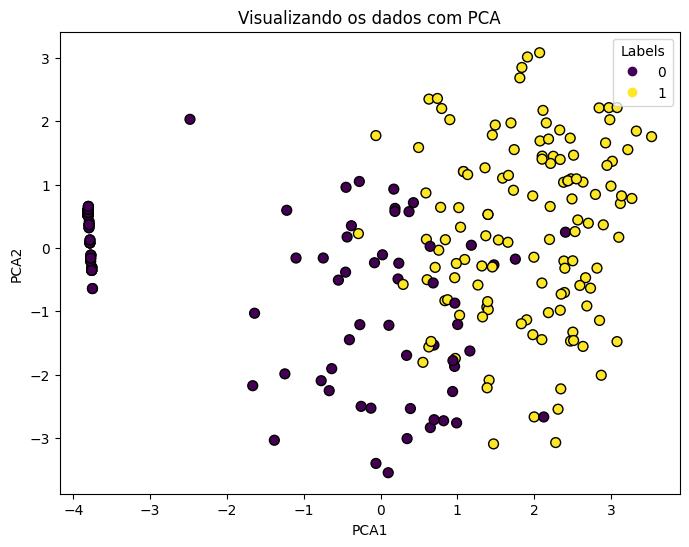

In [79]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca_visu = PCA(n_components=2)
principal_components = pca_visu.fit_transform(df_x_teste)

x_pca = pd.DataFrame(principal_components, columns=['PCA1', 'PCA2'])

plt.figure(figsize=(8,6))
scatter = plt.scatter(x_pca['PCA1'], x_pca['PCA2'], c=predict, edgecolor='k', s=50, cmap='viridis')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.title('Visualizando os dados com PCA')
plt.legend(*scatter.legend_elements(), title="Labels")
plt.show()

## Testando modelo

### Tratando

#### Juntando bases

In [80]:
df_x_geral = pd.concat([df_x, df_x_teste], axis=0, join='inner', ignore_index=True)
df_x_geral

,Em qual faixa etária você se encaixa?,Qual a renda per capita da sua casa?,Há quanto tempo você se interessa por arte?,Qual das opções de arte abaixo você mais gosta?,Com que frequência você vai aos museus?,Você já participou de algum curso ou atividade relacionada à arte?,Você segue artístas ou páginas relacionadas à arte nas rede sociais?,"Como é sua experiência ao visitar um museu normalmente? Caso nunca tenha visitado, selecione a que você acredita que seguiria.",Você já usou um aplicativo de um museu ou relacionado à arte?,O que mais te atrai em visitar museus ou exposições de arte?,Você sente falta de mais informações sobre as obras nos museus?,Você procura saber sobre essas informações faltantes?,De que forma você costuma buscar essas informações?,Você encontra o que precisa/esperava ao pesquisar?,Usaria o aplicativo?
0,-1.156307,-2.214837,-1.469837,-0.632643,-0.335326,-0.513784,-1.380105,-0.217847,-0.447972,0.111427,-0.140905,-0.012829,-0.413717,-0.160627,0
1,-0.573876,-1.573839,-0.527665,-1.362111,0.041717,0.420655,0.096042,0.618772,1.305835,-0.312318,-0.262134,-0.759517,0.193545,-0.225371,0
2,-1.657357,-1.391032,1.225879,-1.080011,0.309245,-0.547145,0.067392,-0.191830,-1.271522,-0.973829,-0.354279,0.009286,0.168676,0.160721,0
3,-0.067718,-1.137739,-0.164123,1.281807,-0.613195,-0.049134,-1.899486,0.289296,-0.366201,0.137053,0.153926,0.579617,0.594394,-0.134903,0
4,-1.821460,-0.249829,-0.865882,0.061037,0.047214,-1.427882,1.218768,-1.064109,0.430687,0.389949,0.209120,-0.234455,0.257865,0.055641,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
283,0.440392,-0.331865,1.048943,0.712778,-0.763184,2.326346,1.210724,0.394477,-0.975907,-1.420575,0.725858,0.077115,0.806241,0.335641,0
284,0.139914,-0.294440,-0.383232,-1.120918,-1.155966,0.837767,1.394796,0.809443,-0.850786,-1.488786,0.047694,-0.048526,0.740698,0.038104,0
285,3.047720,1.075275,-0.149407,-1.787578,-1.267745,-1.330431,-0.868435,1.204321,-1.447020,0.005605,1.383970,0.581580,-0.201024,0.648225,1
286,0.004943,0.721436,0.715005,-1.186774,-0.442259,1.507611,-1.179863,0.709709,-0.521383,-0.160129,-0.636069,0.109337,1.963489,-0.065224,0


#### Atributo e resposta

In [81]:
df_x_geral, df_y_geral = df_x_geral.drop(columns=['Usaria o aplicativo?']), df_x_geral['Usaria o aplicativo?']

#### Treino e teste

In [82]:
x = df_x_geral.drop(df_x.index)
y = (df_y_geral.drop(df_y.index))

In [83]:
from sklearn.model_selection import train_test_split


x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, test_size=0.20, random_state=SEED)

display(x_treino)
display(y_treino)
display(x_teste)
display(y_teste)

,Em qual faixa etária você se encaixa?,Qual a renda per capita da sua casa?,Há quanto tempo você se interessa por arte?,Qual das opções de arte abaixo você mais gosta?,Com que frequência você vai aos museus?,Você já participou de algum curso ou atividade relacionada à arte?,Você segue artístas ou páginas relacionadas à arte nas rede sociais?,"Como é sua experiência ao visitar um museu normalmente? Caso nunca tenha visitado, selecione a que você acredita que seguiria.",Você já usou um aplicativo de um museu ou relacionado à arte?,O que mais te atrai em visitar museus ou exposições de arte?,Você sente falta de mais informações sobre as obras nos museus?,Você procura saber sobre essas informações faltantes?,De que forma você costuma buscar essas informações?,Você encontra o que precisa/esperava ao pesquisar?
195,-2.900246,1.367403,-0.554396,-1.016702,-0.262353,-1.251499,-1.189415,-0.566455,-0.432051,-0.487343,-0.137444,-0.879258,-0.310931,0.039519
252,0.829899,-0.651560,-0.193824,-0.597203,-0.257003,1.101365,1.876318,-0.027120,0.023508,-0.648812,0.268808,-0.247152,1.286977,0.198735
158,-2.956441,1.195519,-1.082752,-0.730263,-0.002955,-1.196569,-1.222986,-0.316552,-0.474465,-0.645519,0.035266,-0.682234,-0.182844,0.076430
236,1.830005,0.871145,0.414803,-1.137611,-1.151910,-1.245408,-1.606843,1.894505,-0.056502,-0.521935,-0.177877,0.461691,0.039062,1.043070
256,1.414486,1.269876,0.771995,-0.688723,-1.552973,0.130658,0.429017,0.890769,-1.496399,-0.532383,0.198013,0.698062,2.044510,1.635701
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146,3.033822,2.103352,0.239275,0.623575,0.694384,-0.785505,0.460928,1.962303,-1.068495,1.414121,1.523935,0.106001,-0.581184,0.784701
54,3.196179,1.071442,-0.230898,-0.812187,-1.887467,-1.643690,-0.476036,0.309008,-1.982726,0.217364,1.782752,0.568158,0.102437,0.805087
132,2.545798,1.552871,-0.957384,0.543267,-1.008022,-0.996509,-1.594585,-0.066404,-0.917588,-1.403578,-0.792171,0.203984,0.270314,0.573851
219,1.062254,2.126268,1.096140,1.060441,-0.312298,-0.536941,1.149403,-0.507703,0.347279,1.802583,-0.171715,1.940041,-1.224522,-0.246262


195    0
252    0
158    0
236    1
256    1
      ..
146    1
54     1
132    1
219    1
142    1
Name: Usaria o aplicativo?, Length: 198, dtype: int64

,Em qual faixa etária você se encaixa?,Qual a renda per capita da sua casa?,Há quanto tempo você se interessa por arte?,Qual das opções de arte abaixo você mais gosta?,Com que frequência você vai aos museus?,Você já participou de algum curso ou atividade relacionada à arte?,Você segue artístas ou páginas relacionadas à arte nas rede sociais?,"Como é sua experiência ao visitar um museu normalmente? Caso nunca tenha visitado, selecione a que você acredita que seguiria.",Você já usou um aplicativo de um museu ou relacionado à arte?,O que mais te atrai em visitar museus ou exposições de arte?,Você sente falta de mais informações sobre as obras nos museus?,Você procura saber sobre essas informações faltantes?,De que forma você costuma buscar essas informações?,Você encontra o que precisa/esperava ao pesquisar?
73,0.517286,-0.913821,-0.367333,-1.218015,-0.456686,-1.234222,-0.075671,1.080754,-0.587184,-1.436773,-0.270285,0.306134,-0.942437,-0.334414
46,-2.782604,1.584941,1.175253,-0.321343,0.131543,-0.254849,-1.466780,-0.718774,-0.307975,-0.488173,0.026757,-0.978928,-0.454411,0.155665
222,2.296580,0.790974,-0.348464,-0.217178,-1.058313,-0.407958,1.509264,0.267536,-0.493649,0.098578,0.535723,0.521127,2.748443,1.722361
126,-2.900246,1.367403,-0.554396,-1.016702,-0.262353,-1.251499,-1.189415,-0.566455,-0.432051,-0.487343,-0.137444,-0.879258,-0.310931,0.039519
196,2.717555,-0.033511,-0.587114,-1.184242,-0.415355,-1.444303,-0.461826,1.236203,0.058784,0.293972,-0.114087,0.982050,0.473082,1.233350
286,0.004943,0.721436,0.715005,-1.186774,-0.442259,1.507611,-1.179863,0.709709,-0.521383,-0.160129,-0.636069,0.109337,1.963489,-0.065224
235,2.625613,1.164457,-0.663938,0.742889,-0.323309,-1.201968,0.945253,1.553789,-0.419638,1.879772,-0.176883,0.417874,-0.387943,1.278417
144,-0.583996,0.693425,-0.949446,-0.334468,0.578313,-0.619816,2.582096,0.181437,-1.228131,0.876754,-0.574620,-0.696571,0.917156,0.103309
49,1.239949,-0.449096,-0.816629,-1.477797,-0.687601,-0.498958,-1.570090,1.264893,-0.305739,-0.027583,-0.849023,0.857029,-0.068869,-0.464565
275,1.919494,1.705110,0.098377,0.306368,-1.193249,-1.269039,0.336036,2.028400,-1.350807,1.195535,-0.455835,0.472450,-0.977468,1.157340


73     0
46     0
222    1
126    0
196    1
286    0
235    1
144    0
49     1
275    1
272    1
276    1
278    1
218    1
106    1
198    0
232    0
55     0
223    1
64     1
160    1
59     1
152    1
107    1
262    0
263    0
240    0
50     0
70     1
136    0
255    0
283    0
157    0
65     0
285    1
58     0
172    1
239    1
95     1
85     0
215    0
149    0
100    0
224    1
56     0
159    0
108    1
220    1
78     0
212    1
Name: Usaria o aplicativo?, dtype: int64

In [84]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import *

K = 5

knn = KNeighborsClassifier(n_neighbors=K)
knn.fit(x_treino, y_treino)
predict = knn.predict(x_teste)
print(len(predict))
print(accuracy_score(y_teste, predict))
print(classification_report(y_teste, predict))

50
0.86
              precision    recall  f1-score   support

           0       1.00      0.72      0.84        25
           1       0.78      1.00      0.88        25

    accuracy                           0.86        50
   macro avg       0.89      0.86      0.86        50
weighted avg       0.89      0.86      0.86        50



### Visualizando modelo

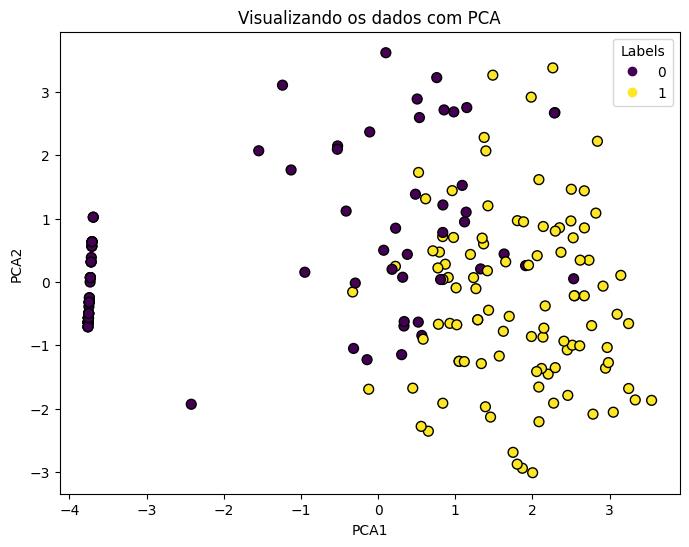

In [85]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca_visu = PCA(n_components=2)
principal_components = pca_visu.fit_transform(x_treino)

x_pca = pd.DataFrame(principal_components, columns=['PCA1', 'PCA2'])

plt.figure(figsize=(8,6))
scatter = plt.scatter(x_pca['PCA1'], x_pca['PCA2'], c=y_treino, edgecolor='k', s=50, cmap='viridis')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.title('Visualizando os dados com PCA')
plt.legend(*scatter.legend_elements(), title="Labels")
plt.show()

## Testando e exportando modelo

In [86]:
modelo = {}

In [87]:
dados_de_teste = pd.read_excel('teste_possiveis_usuarios.xlsx')
dados_de_teste

,Em qual faixa etária você se encaixa?,Qual a renda per capita da sua casa?,Há quanto tempo você se interessa por arte?,Qual das opções de arte abaixo você mais gosta?,Com que frequência você vai aos museus?,Você já participou de algum curso ou atividade relacionada à arte?,Você segue artístas ou páginas relacionadas à arte nas rede sociais?,"Como é sua experiência ao visitar um museu normalmente? Caso nunca tenha visitado, selecione a que você acredita que seguiria.",Você já usou um aplicativo de um museu ou relacionado à arte?,O que mais te atrai em visitar museus ou exposições de arte?,Você sente falta de mais informações sobre as obras nos museus?,Você procura saber sobre essas informações faltantes?,De que forma você costuma buscar essas informações?,Você encontra o que precisa/esperava ao pesquisar?,Usaria o aplicativo?
0,Menos de 18 anos,"Classes D/E: até R$ 2,9 mil",Menos de 2 anos,Arte de rua/grafite,Raramente (uma vez ao ano),Sim,Sim,Sem um guia/planejamento para ver as obras.,Não,Lazer,"Sim, sinto falta de mais informações","Não, apenas me conformo",NaN,NaN,Sim


### Tratando dados de teste

#### Nulos

In [88]:
dados_de_teste.fillna({'Qual das opções de arte abaixo você mais gosta?': 'Não se interessa por arte', 'Com que frequência você vai aos museus?': 'Não se interessa por arte', 'Você já participou de algum curso ou atividade relacionada à arte?': 'Não se interessa por arte', 'Você segue artístas ou páginas relacionadas à arte nas rede sociais?': 'Não se interessa por arte', 'Como é sua experiência ao visitar um museu normalmente? Caso nunca tenha visitado, selecione a que você acredita que seguiria.': 'Não se interessa por arte', 'Você já usou um aplicativo de um museu ou relacionado à arte?': 'Não se interessa por arte', 'O que mais te atrai em visitar museus ou exposições de arte?': 'Não se interessa por arte'}, inplace=True)
dados_de_teste.fillna({'Você sente falta de mais informações sobre as obras nos museus?': 'Não vai a museus'}, inplace=True)
dados_de_teste.fillna({'Você procura saber sobre essas informações faltantes?': 'Não sente falta de informações'}, inplace=True)
dados_de_teste.fillna({'De que forma você costuma buscar essas informações?': 'Não procura essas informações', 'Você encontra o que precisa/esperava ao pesquisar?': 'Não procura essas informações'}, inplace=True)

dados_de_teste.isna().sum()

Em qual faixa etária você se encaixa?                                                                                             0
Qual a renda per capita da sua casa?                                                                                              0
Há quanto tempo você se interessa por arte?                                                                                       0
Qual das opções de arte abaixo você mais gosta?                                                                                   0
Com que frequência você vai aos museus?                                                                                           0
Você já participou de algum curso ou atividade relacionada à arte?                                                                0
Você segue artístas ou páginas relacionadas à arte nas rede sociais?                                                              0
Como é sua experiência ao visitar um museu normalmente? Caso nunca tenha vis

#### Atributo e resposta

In [89]:
df_x_teste = dados_de_teste.drop(columns=['Usaria o aplicativo?'])
display(df_x_teste.head())

,Em qual faixa etária você se encaixa?,Qual a renda per capita da sua casa?,Há quanto tempo você se interessa por arte?,Qual das opções de arte abaixo você mais gosta?,Com que frequência você vai aos museus?,Você já participou de algum curso ou atividade relacionada à arte?,Você segue artístas ou páginas relacionadas à arte nas rede sociais?,"Como é sua experiência ao visitar um museu normalmente? Caso nunca tenha visitado, selecione a que você acredita que seguiria.",Você já usou um aplicativo de um museu ou relacionado à arte?,O que mais te atrai em visitar museus ou exposições de arte?,Você sente falta de mais informações sobre as obras nos museus?,Você procura saber sobre essas informações faltantes?,De que forma você costuma buscar essas informações?,Você encontra o que precisa/esperava ao pesquisar?
0,Menos de 18 anos,"Classes D/E: até R$ 2,9 mil",Menos de 2 anos,Arte de rua/grafite,Raramente (uma vez ao ano),Sim,Sim,Sem um guia/planejamento para ver as obras.,Não,Lazer,"Sim, sinto falta de mais informações","Não, apenas me conformo",Não procura essas informações,Não procura essas informações


#### Transformando em númerico com pesos

In [90]:
dados_de_teste.fillna({'Qual das opções de arte abaixo você mais gosta?': 'Não se interessa por arte', 'Com que frequência você vai aos museus?': 'Não se interessa por arte', 'Você já participou de algum curso ou atividade relacionada à arte?': 'Não se interessa por arte', 'Você segue artístas ou páginas relacionadas à arte nas rede sociais?': 'Não se interessa por arte', 'Como é sua experiência ao visitar um museu normalmente? Caso nunca tenha visitado, selecione a que você acredita que seguiria.': 'Não se interessa por arte', 'Você já usou um aplicativo de um museu ou relacionado à arte?': 'Não se interessa por arte', 'O que mais te atrai em visitar museus ou exposições de arte?': 'Não se interessa por arte'}, inplace=True)
dados_de_teste.fillna({'Você sente falta de mais informações sobre as obras nos museus?': 'Não vai a museus'}, inplace=True)
dados_de_teste.fillna({'Você procura saber sobre essas informações faltantes?': 'Não sente falta de informações'}, inplace=True)
dados_de_teste.fillna({'De que forma você costuma buscar essas informações?': 'Não procura essas informações', 'Você encontra o que precisa/esperava ao pesquisar?': 'Não procura essas informações'}, inplace=True)

mapeamento_tipo_arte = {'Não se interessa por arte': 0, 'Pintura': 8, 'Fotografia': 8, 'Escultura': 6, 'Arquitetura e Urbanismo': 5, 'Arte digital': 4,'Arte de rua/grafite': 3}
mapeamento_frequencia = {'Não se interessa por arte': 0, 'Frequentemente (máximo cinco vezes ao ano)': 10,'Muito frequentemente (mais de cinco vezes ao ano)': 9,'Ocasionalmente (máximo três vezes ao ano)': 8,'Raramente (uma vez ao ano)': 5,'Nunca': 1}
mapeamento_guia = {'Não se interessa por arte': 0, 'Planejo minha rota antes.': 10, 'Utilizo o planejamento de terceiros (sites, blogs, páginas em redes sociais que disponibilizam).': 9, 'Com um guia do próprio museu.': 8, 'Sem um guia/planejamento para ver as obras.': 2}
mapeamento_motivo = {'Não se interessa por arte': 0, 'Aprendizado': 10, 'Inspiração': 9, 'Lazer': 6, 'Apenas acompanho alguém': 3, 'Não visito': 1}
mapeamento_falta_info = {'Não vai a museus': 1, 'Sim, sinto falta de mais informações': 10, 'Não, acredito que o que tem no museu é o suficiente': 4}
mapeamento_procurar_info = {'Não sente falta de informações': 3, 'Sim, procuro': 10, 'Não, apenas me conformo': 5}
mapeamento_achar_info = {'Não procura essas informações': 3, 'Sim': 4, 'Não': 10}
mapeamento = {'Qual das opções de arte abaixo você mais gosta?': mapeamento_tipo_arte, 'Com que frequência você vai aos museus?': mapeamento_frequencia, 'Como é sua experiência ao visitar um museu normalmente? Caso nunca tenha visitado, selecione a que você acredita que seguiria.': mapeamento_guia, 'O que mais te atrai em visitar museus ou exposições de arte?': mapeamento_motivo, 'Você sente falta de mais informações sobre as obras nos museus?': mapeamento_falta_info, 'Você procura saber sobre essas informações faltantes?': mapeamento_procurar_info, 'Você encontra o que precisa/esperava ao pesquisar?': mapeamento_achar_info}

mapeamento_geral = {'Em qual faixa etária você se encaixa?': {'Menos de 18 anos': 0,
'Entre 25 e 35 anos': 1,
'Entre 46 e 59 anos': 2,
'Entre 36 e 45 anos': 3,
'Entre 18 e 24 anos': 4,
'60+ anos': 5},
'Qual a renda per capita da sua casa?': {'Classes D/E: até R$ 2,9 mil': 0,
'Classe C: entre R$ 2,9 mil e R$ 7,1 mil': 1,
'Classe B: entre R$ 7,1 mil e R$ 22 mil': 2,
'Classe A: superior a R$ 22 mil': 3},
'Há quanto tempo você se interessa por arte?': {'Menos de 2 anos': 0,
'Não me interesso': 1,
'De 2 a 4 anos': 2,
'Estou iniciando agora': 3,
'Há mais de 10 anos': 4,
'De 5 a 9 anos': 5},
'Você já participou de algum curso ou atividade relacionada à arte?': {'Não': 0,
'Não se interessa por arte': 1,
'Sim': 2},
'Você segue artístas ou páginas relacionadas à arte nas rede sociais?': {'Sim': 0,
'Não se interessa por arte': 1,
'Não': 2},
'Você já usou um aplicativo de um museu ou relacionado à arte?': {'Não': 0,
'Não se interessa por arte': 1,
'Sim': 2},
'De que forma você costuma buscar essas informações?': {'Busca em navegadores (Google, Yahoo, Edge, Opera, Fox, entre outros)': 0,
'Não procura essas informações': 1,
'Aplicativos': 2,
'Busca em inteligências artificiais (ChatGPT, Gemini, entre outros)': 3,
'Redes sociais': 4,
'Blogs favoritos': 5,
'Livros': 6}}

print(dados_de_teste.columns)

for i in df_x_teste:
    if df_x_teste[i].dtype == object:
        if i in mapeamento.keys():
            df_x_teste[i] = df_x_teste[i].map(mapeamento[i])
        else:
            df_x_teste[i] = df_x_teste[i].map(mapeamento_geral[i])

df_x_teste = df_x_teste[['Em qual faixa etária você se encaixa?',
'Qual a renda per capita da sua casa?',
'Há quanto tempo você se interessa por arte?',
'Qual das opções de arte abaixo você mais gosta?',
'Com que frequência você vai aos museus?',
'Você já participou de algum curso ou atividade relacionada à arte?',
'Você segue artístas ou páginas relacionadas à arte nas rede sociais?',
'Como é sua experiência ao visitar um museu normalmente? Caso nunca tenha visitado, selecione a que você acredita que seguiria.',
'Você já usou um aplicativo de um museu ou relacionado à arte?',
'O que mais te atrai em visitar museus ou exposições de arte?',
'Você sente falta de mais informações sobre as obras nos museus?',
'Você procura saber sobre essas informações faltantes?',
'De que forma você costuma buscar essas informações?',
'Você encontra o que precisa/esperava ao pesquisar?']]

Index(['Em qual faixa etária você se encaixa?',
       'Qual a renda per capita da sua casa?',
       'Há quanto tempo você se interessa por arte?',
       'Qual das opções de arte abaixo você mais gosta?',
       'Com que frequência você vai aos museus?',
       'Você já participou de algum curso ou atividade relacionada à arte?',
       'Você segue artístas ou páginas relacionadas à arte nas rede sociais?',
       'Como é sua experiência ao visitar um museu normalmente? Caso nunca tenha visitado, selecione a que você acredita que seguiria.',
       'Você já usou um aplicativo de um museu ou relacionado à arte?',
       'O que mais te atrai em visitar museus ou exposições de arte?',
       'Você sente falta de mais informações sobre as obras nos museus?',
       'Você procura saber sobre essas informações faltantes?',
       'De que forma você costuma buscar essas informações?',
       'Você encontra o que precisa/esperava ao pesquisar?',
       'Usaria o aplicativo?'],
      dtype='o

In [91]:
df_x_teste

,Em qual faixa etária você se encaixa?,Qual a renda per capita da sua casa?,Há quanto tempo você se interessa por arte?,Qual das opções de arte abaixo você mais gosta?,Com que frequência você vai aos museus?,Você já participou de algum curso ou atividade relacionada à arte?,Você segue artístas ou páginas relacionadas à arte nas rede sociais?,"Como é sua experiência ao visitar um museu normalmente? Caso nunca tenha visitado, selecione a que você acredita que seguiria.",Você já usou um aplicativo de um museu ou relacionado à arte?,O que mais te atrai em visitar museus ou exposições de arte?,Você sente falta de mais informações sobre as obras nos museus?,Você procura saber sobre essas informações faltantes?,De que forma você costuma buscar essas informações?,Você encontra o que precisa/esperava ao pesquisar?
0,0,0,0,3,5,2,0,2,0,6,10,5,1,3


#### Normalizando

In [92]:
from sklearn.preprocessing import StandardScaler

colunas = df_x_teste.columns

df_x_teste = ss.transform(df_x_teste)
pd.DataFrame(df_x_teste, columns=colunas)

,Em qual faixa etária você se encaixa?,Qual a renda per capita da sua casa?,Há quanto tempo você se interessa por arte?,Qual das opções de arte abaixo você mais gosta?,Com que frequência você vai aos museus?,Você já participou de algum curso ou atividade relacionada à arte?,Você segue artístas ou páginas relacionadas à arte nas rede sociais?,"Como é sua experiência ao visitar um museu normalmente? Caso nunca tenha visitado, selecione a que você acredita que seguiria.",Você já usou um aplicativo de um museu ou relacionado à arte?,O que mais te atrai em visitar museus ou exposições de arte?,Você sente falta de mais informações sobre as obras nos museus?,Você procura saber sobre essas informações faltantes?,De que forma você costuma buscar essas informações?,Você encontra o que precisa/esperava ao pesquisar?
0,-1.474021,-1.040833,-1.323959,-0.777673,-0.195522,1.975658,-1.032094,-0.981645,-0.60445,0.08382,1.610602,0.586588,0.066082,0.109472


In [93]:
modelo['StandardScaler'] = ss

#### PCA

In [94]:
from sklearn.decomposition import PCA

df_x_teste = pca.transform(df_x_teste)
df_x_teste = pd.DataFrame(df_x_teste, columns=colunas)
df_x_teste

,Em qual faixa etária você se encaixa?,Qual a renda per capita da sua casa?,Há quanto tempo você se interessa por arte?,Qual das opções de arte abaixo você mais gosta?,Com que frequência você vai aos museus?,Você já participou de algum curso ou atividade relacionada à arte?,Você segue artístas ou páginas relacionadas à arte nas rede sociais?,"Como é sua experiência ao visitar um museu normalmente? Caso nunca tenha visitado, selecione a que você acredita que seguiria.",Você já usou um aplicativo de um museu ou relacionado à arte?,O que mais te atrai em visitar museus ou exposições de arte?,Você sente falta de mais informações sobre as obras nos museus?,Você procura saber sobre essas informações faltantes?,De que forma você costuma buscar essas informações?,Você encontra o que precisa/esperava ao pesquisar?
0,-0.025292,0.873225,-1.819448,-0.054883,0.136806,-0.780829,-1.497677,1.831179,-0.729569,1.523021,-1.121526,0.094865,-0.46714,-0.522248


In [95]:
modelo['PCA'] = pca

#### Modelo

In [96]:
predict = knn.predict(df_x_teste)
print(len(predict))

1


In [97]:
modelo['Algoritmo'] = knn

### Exportando

In [98]:
import pickle

with open('possiveis_usuarios.pkl', 'wb') as arquivo:
    pickle.dump(modelo, arquivo)

## Conclusão

Após testar modelos não supervisionados e diversos outros supervisionados, os resultados estavam muitos enviesados com um resultado muito alto. Após orientações do professor Modolo e da professora Myrna, com a ajuda do ChatGPT e minha análise, foram criados 40 dados fictícios com uma variável resposta coerente com os dados das colunas anteriores. Esta base foi usada como teste com o treino sendo o resultado inteiro do modelo não supervisionado. A acurácia não estava boa, então acabamos utilizando apenas o modelo supervisionado com KNN na seguinte lógica:
- Treinar um modelo de KNN com os 40 dados criados;
- Predizer e atribuir a label dos dados coletados do forms (link disponibilizado via Outlook em agosto de 2024), dados nos quais estavam sendo usados para montar clusters e atribuir uma label com o modelo não supervisionado;
- Após a atribuição das labels na base de dados do forms, um novo modelo é instanciado e treinado com os 40 dados criados e os do forms que foram divididos entre treino e teste;
- Damos predict no teste retornando assim uma ótima acurácia;
- Ao testarmos com uma terceira base (contém somente 1 dado), o modelo retorna a resposta correta.

Essa lógica para a predição veio apartir do modo que o algoritmo de KNN faz o cálculo do resultado. Primeiro sendo treinado com uma pequena base de dados com as características que achamos que mais se assemelham a usuários do aplicativo, criando assim apenas alguns pontos no plano cartesiano com label. Depois, predizer e atribuir resultado a base do forms, instanciando e treinando um novo modelo com ambas as bases, encrementando então o modelo anterior. O que antes eram apenas alguns pontos, agora existem pontos como "centros" e dados em torno com variações para evitar o overfitting (principal dificuldade enfrentada nos modelos anteriores). Esse foi o criério de escolha decisivo de qual algoritmo usaríamos para predizer possíveis usuários.